<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/Optuna_VAE_2_26_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Instalation 
---

In [ ]:
# !pip install captum
# !pip install umap-learn
# !pip install datashader
# !pip install bokeh
# !pip install holoviews
!pip install tensorboardX
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 3.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.4 MB/s eta 0:00:00


---
VAE Experiment 1 **[]** 2/26
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torchvision
from torchvision import datasets

#based on sensor data can you determine the stimulus that is currently in use?
import optuna

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/Subject_Experiment_1/S2_E1_A1.csv")
#drops all 0 labels (no label)
indices_to_drop = df[df["stimulus"] == 0].index
df.drop(indices_to_drop, inplace=True)

#Removes number of features from data
# df.drop('Cyber Glove (angles of the joints) Sensor 1', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 2', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 3', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 4', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 5', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 6', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 7', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 8', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 9', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 10', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 11', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 12', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 13', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 14', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 15', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 16', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 17', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 18', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 19', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 20', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 21', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 22', inplace=True, axis=1)

In [ ]:
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
862,1,-0.03418,0.84131,-0.51855,0,-1,-1,0,0,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
863,1,-0.03418,0.84131,-0.51855,0,0,-2,-2,-2,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
864,1,-0.03418,0.84131,-0.51855,-1,0,-1,-2,-1,-2,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
865,1,-0.03418,0.84131,-0.51855,-4,-5,-5,-1,0,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
866,1,-0.03418,0.84131,-0.51855,0,-2,-1,-1,-1,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553


In [ ]:
X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

(90015, 41) <class 'pandas.core.frame.DataFrame'> (90015, 1) <class 'pandas.core.frame.DataFrame'>



In [ ]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
862,-0.03418,0.84131,-0.51855,0,-1,-1,0,0,0,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
863,-0.03418,0.84131,-0.51855,0,0,-2,-2,-2,0,1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
864,-0.03418,0.84131,-0.51855,-1,0,-1,-2,-1,-2,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
865,-0.03418,0.84131,-0.51855,-4,-5,-5,-1,0,-1,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
866,-0.03418,0.84131,-0.51855,0,-2,-1,-1,-1,-1,-2,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553


---
Visualization number of labels

stimulus
10          7931
6           7619
8           7580
7           7567
5           7564
11          7539
4           7473
3           7424
9           7397
12          7357
2           7329
1           7235
dtype: int64

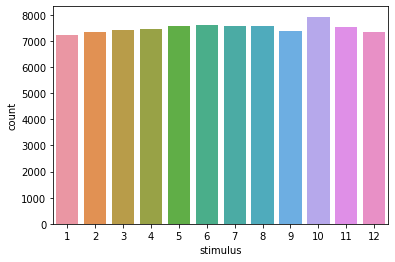

In [ ]:
sns.countplot(x = 'stimulus', data=df)
y.value_counts()

---
Fixing Data Imbalance via Undersampling

<AxesSubplot:xlabel='stimulus'>

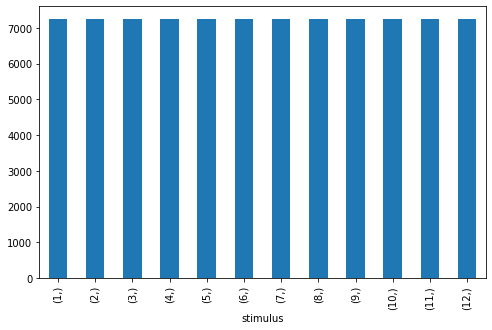

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot(kind='bar', figsize=(8,5))

In [ ]:
print(y_res.value_counts())
print(len(X_res.value_counts()))

stimulus
1           7235
2           7235
3           7235
4           7235
5           7235
6           7235
7           7235
8           7235
9           7235
10          7235
11          7235
12          7235
dtype: int64
86820


In [ ]:
print(y)

        stimulus
862            1
863            1
864            1
865            1
866            1
...          ...
148362        12
148363        12
148364        12
148365        12
148366        12

[90015 rows x 1 columns]


---
Visualization of Data Distributions

In [ ]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()

---
Defining Hyperparmaeters

In [ ]:
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
emg_channels = 16
imu_channels = 3

latent_dim = 2
input_dim= len(X.columns)

hidden_dim= round(input_dim/2)
hidden_dim_2 = round(input_dim/4)
output_dim = len(X.columns)
num_classes = 12
num_layers = round(num_classes/2)
tempature = 1

num_epochs= 10
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant
l2_lambda = 0


alpha = 2        # Reconstruction Loss
beta = 2         # Kl Divergence Loss
gamma = 3        # Classifcation Loss
delta = 5        # Contrastive Loss
epsilon = 3      # Triplet Loss

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

---
Train Test Split

In [ ]:
X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

(86820, 41) <class 'numpy.ndarray'> (86820, 1) <class 'numpy.ndarray'>

X_train size: 52092 | X_val size: 17364 | X_test size: 17364
y_train size: 52092 | y_val size: 17364 | y_test size: 17364

Training Feature Split: (52092, 41) | Training Labels (52092, 1)
Validation Feature Split: (17364, 41) | Validation Labels (17364, 1)
Testing Feature Split: (17364, 41) | Testing Labels (17364, 1)



---
Scaling/Normalizing Data

In [ ]:
#Normalization Data 

#No Normalization 
# X_train_Normalized = X_train
# X_val_Normalized = X_val
# X_test_Normalized = X_test
#----------------------------------------------------------------------------------------------------------
# Minmax without preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train)
# X_val_Normalized = Minmax.transform(X_val)
# X_test_Normalized = Minmax.transform(X_test)
#----------------------------------------------------------------------------------------------------------
# Minmax with preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train_preprocessed)
# X_val_Normalized = Minmax.transform(X_val_preprocessed)
# X_test_Normalized = Minmax.transform(X_test_preprocessed)

#----------------------------------------------------------------------------------------------------------
# # Standardization without preprocessing
Standardized = preprocessing.StandardScaler()
X_train_Normalized= Standardized.fit_transform(X_train)
X_val_Normalized = Standardized.transform(X_val)
X_test_Normalized = Standardized.transform(X_test)

# Standardization with preprocessing
# Standardized = preprocessing.StandardScaler()
# X_train_Normalized= Standardized.fit_transform(X_train_preprocessed)
# X_val_Normalized = Standardized.transform(X_val_preprocessed)
# X_test_Normalized = Standardized.transform(X_test_preprocessed)
#----------------------------------------------------------------------------------------------------------

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Normalized).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Normalized).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Normalized).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([52092, 41]) , torch.Size([52092, 1])
Validation: torch.Size([17364, 41]) , torch.Size([17364, 1])
Testing:  torch.Size([17364, 41]) , torch.Size([17364, 1])


---
Defining Dataloaders


In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

In [ ]:
training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)


train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)

def get_data_loader(optuna_batch_size):
  train_loader = DataLoader(training, batch_size=optuna_batch_size, shuffle=True)
  val_loader = DataLoader(validating, batch_size=optuna_batch_size, shuffle=False)
  test_loader = DataLoader(testing, batch_size=optuna_batch_size, shuffle=False)
  return train_loader, val_loader, test_loader

---
Defining VAE Model, Loss and Optmizers

In [ ]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.encoder = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
    )
    self.mu = nn.Linear(hidden_dim_2, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim_2, latent_dim)   # log-var
    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, input_dim),
    )
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, num_layers),
        nn.ReLU(),
        nn.Linear(num_layers, 13),
        nn.Softmax(dim=1)
    )

  def encode(self, x):  
    z = self.encoder(x)
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):

    return self.decoder(x)

  def forward(self, x):
#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   

    x_reconstructed = self.decode(z_reparmeterized)
    classified = self.classifier(z_reparmeterized)
    classified = classified / tempature

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(f"Reconstruction X: {x_reconstructed.shape}")

  print(f"Mu: {mu.shape} ")
  
  print(f"Logvar: {logvar.shape}")
 
  print(f"Latent Space Z: {z_reparmeterized.shape}")
 
  print(f"Classifier: {classified.shape}")

Reconstruction X: torch.Size([100, 41])
Mu: torch.Size([100, 2]) 
Logvar: torch.Size([100, 2])
Latent Space Z: torch.Size([100, 2])
Classifier: torch.Size([100, 13])


In [ ]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss

In [ ]:
def train_VAE(model, train_loader, val_loader, optimizer, epoch,alpha,beta,gamma, delta):
  train_losses=[]
  train_accuracy = []
  accuracy_log = []
  val_losses=[]
  val_accuracy=[]

  recon_loss_fn = nn.MSELoss(reduction="sum")
  classifier_loss_fn = nn.CrossEntropyLoss()
  contrastive_loss_fn = ContrastiveLoss(margin=1)

  train_running_loss = 0
  model.train()
  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = recon_loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

  
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + (delta*contrastive_loss)

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = recon_loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

  return train_losses, val_losses, train_acc, val_acc



In [ ]:
def objective(trial):
  params = {
          'optuna_batch_size' : trial.suggest_int('optuna_batch_size', 1e1, 1e3),
          'num_epochs' : num_epochs,
          'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop"]),
          "lr": trial.suggest_float('lr', 1e-4, 1e-2),
          'alpha': trial.suggest_float('alpha', 1e-1, 1e1),
          'beta': trial.suggest_float('beta', 1e-1, 1e1), 
          'gamma': trial.suggest_float('gamma', 1e-1, 1e1), 
          'delta': trial.suggest_float('delta', 1e-1, 1e1),        
  }

  train_loader, val_loader, test_loader = get_data_loader(params['optuna_batch_size'])
  model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
  optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr=params['lr'])

  for epoch in range(params['num_epochs']):
    train_losses, val_losses, train_acc, val_acc = train_VAE(model, train_loader, val_loader, optimizer, epoch, alpha, beta, gamma, delta)
  return train_acc


In [ ]:
sampler = optuna.samplers.TPESampler()    
study = optuna.create_study(
    sampler=sampler,
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=3, n_warmup_steps=5, interval_steps=3
    ),
    direction='maximize')
study.optimize(func=objective, n_trials=100)

[I 2023-02-27 14:51:30,365] A new study created in memory with name: no-name-c705acf0-ebff-4699-83aa-be03bc3c48c1


Epoch: 1 / 10 | Reconst_loss: 4540.392 | Kldiv loss: 1457.859 | Classifcation loss: 2.391 | Constrast loss: 178.47 | Total loss: 169480.996 | Train acc: 16.775 % ||| Val Loss: 47091.259 | Val acc: 28.345 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4123.983 | Kldiv loss: 1221.130 | Classifcation loss: 2.282 | Constrast loss: 91.28 | Total loss: 42118.648 | Train acc: 39.590 % ||| Val Loss: 37990.319 | Val acc: 48.514 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | Reconst_loss: 3447.755 | Kldiv loss: 1133.420 | Classifcation loss: 2.098 | Constrast loss: 92.86 | Total loss: 37086.417 | Train acc: 54.275 % ||| Val Loss: 34223.756 | Val acc: 58.110 %
----------------------

[I 2023-02-27 14:52:13,344] Trial 0 finished with value: 0.6813854094549989 and parameters: {'optuna_batch_size': 433, 'optimizer': 'Adam', 'lr': 0.007142991214187703, 'alpha': 0.613398181194712, 'beta': 2.3427079258880097, 'gamma': 4.778257781750971, 'delta': 2.953625119899875}. Best is trial 0 with value: 0.6813854094549989.


Epoch: 10 / 10 | Reconst_loss: 3225.399 | Kldiv loss: 1010.571 | Classifcation loss: 2.055 | Constrast loss: 20.01 | Total loss: 27987.442 | Train acc: 68.139 % ||| Val Loss: 27405.789 | Val acc: 68.623 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8119.320 | Kldiv loss: 1690.253 | Classifcation loss: 2.463 | Constrast loss: 426.89 | Total loss: 100248.068 | Train acc: 24.593 % ||| Val Loss: 46773.569 | Val acc: 28.738 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8001.046 | Kldiv loss: 1685.203 | Classifcation loss: 2.245 | Constrast loss: 172.36 | Total loss: 44144.284 | Train acc: 43.056 % ||| Val Loss: 39503.995 | Val acc: 47.708 %
--------------------

[I 2023-02-27 14:52:33,790] Trial 1 finished with value: 0.5958698019567585 and parameters: {'optuna_batch_size': 455, 'optimizer': 'RMSprop', 'lr': 0.008494511075845958, 'alpha': 9.63870119261092, 'beta': 0.18818129122977983, 'gamma': 5.992320536409426, 'delta': 3.70847809793785}. Best is trial 0 with value: 0.6813854094549989.


Epoch: 10 / 10 | Reconst_loss: 5067.314 | Kldiv loss: 1630.236 | Classifcation loss: 2.069 | Constrast loss: 59.65 | Total loss: 31560.086 | Train acc: 59.587 % ||| Val Loss: 28832.056 | Val acc: 60.072 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 654.979 | Kldiv loss: 101.768 | Classifcation loss: 2.378 | Constrast loss: 7.11 | Total loss: 38870.710 | Train acc: 20.838 % ||| Val Loss: 17808.107 | Val acc: 33.630 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 434.726 | Kldiv loss: 140.175 | Classifcation loss: 2.022 | Constrast loss: 3.40 | Total loss: 15604.398 | Train acc: 49.907 % ||| Val Loss: 15378.286 | Val acc: 54.477 %
-----------------------------

[I 2023-02-27 14:53:02,450] Trial 2 finished with value: 0.6777261858180086 and parameters: {'optuna_batch_size': 205, 'optimizer': 'Adam', 'lr': 0.00696398444720493, 'alpha': 9.902725522434574, 'beta': 5.7148414618154835, 'gamma': 7.18673261162957, 'delta': 3.2312116202040517}. Best is trial 0 with value: 0.6813854094549989.


Epoch: 10 / 10 | Reconst_loss: 425.883 | Kldiv loss: 118.628 | Classifcation loss: 2.071 | Constrast loss: 1.00 | Total loss: 12015.283 | Train acc: 67.773 % ||| Val Loss: 12034.391 | Val acc: 66.629 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5255.246 | Kldiv loss: 1171.910 | Classifcation loss: 2.348 | Constrast loss: 192.65 | Total loss: 34197.017 | Train acc: 22.818 % ||| Val Loss: 18438.447 | Val acc: 36.945 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3518.137 | Kldiv loss: 974.263 | Classifcation loss: 2.208 | Constrast loss: 230.75 | Total loss: 16653.290 | Train acc: 45.807 % ||| Val Loss: 15107.684 | Val acc: 50.718 %
-------------------------

[I 2023-02-27 14:53:43,474] Trial 3 finished with value: 0.6096238929122161 and parameters: {'optuna_batch_size': 212, 'optimizer': 'Adam', 'lr': 0.007424729313186141, 'alpha': 3.7850704700060795, 'beta': 5.736828856984825, 'gamma': 2.862516970299144, 'delta': 9.681369610790359}. Best is trial 0 with value: 0.6813854094549989.


Epoch: 10 / 10 | Reconst_loss: 3188.200 | Kldiv loss: 976.305 | Classifcation loss: 2.085 | Constrast loss: 113.31 | Total loss: 12568.933 | Train acc: 60.962 % ||| Val Loss: 12461.149 | Val acc: 61.106 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6010.800 | Kldiv loss: 5457.299 | Classifcation loss: 2.504 | Constrast loss: 444.40 | Total loss: 460266.697 | Train acc: 14.225 % ||| Val Loss: 115424.387 | Val acc: 17.082 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6229.037 | Kldiv loss: 2218.081 | Classifcation loss: 2.436 | Constrast loss: 251.49 | Total loss: 83947.687 | Train acc: 23.191 % ||| Val Loss: 73562.162 | Val acc: 28.607 %
-------------------

[I 2023-02-27 14:54:06,442] Trial 4 finished with value: 0.6026056783841572 and parameters: {'optuna_batch_size': 649, 'optimizer': 'Adam', 'lr': 0.006618583898366495, 'alpha': 3.639796932961459, 'beta': 3.957612269177124, 'gamma': 5.58257273793272, 'delta': 6.245970371280706}. Best is trial 0 with value: 0.6813854094549989.


Epoch: 10 / 10 | Reconst_loss: 3850.823 | Kldiv loss: 1623.767 | Classifcation loss: 2.057 | Constrast loss: 113.91 | Total loss: 51501.526 | Train acc: 60.261 % ||| Val Loss: 49673.242 | Val acc: 59.876 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 334.256 | Kldiv loss: 58.479 | Classifcation loss: 2.259 | Constrast loss: 0.00 | Total loss: 8992.807 | Train acc: 26.792 % ||| Val Loss: 6858.468 | Val acc: 44.868 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 366.967 | Kldiv loss: 52.674 | Classifcation loss: 2.135 | Constrast loss: 3.33 | Total loss: 6560.335 | Train acc: 50.621 % ||| Val Loss: 6070.757 | Val acc: 60.108 %
----------------------------------

[I 2023-02-27 14:54:48,334] Trial 5 finished with value: 0.75172982193855 and parameters: {'optuna_batch_size': 93, 'optimizer': 'RMSprop', 'lr': 0.0022707307286309155, 'alpha': 2.3997451665055984, 'beta': 9.14094444572926, 'gamma': 7.908484642933683, 'delta': 3.6489137853133657}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 167.129 | Kldiv loss: 57.293 | Classifcation loss: 2.012 | Constrast loss: 4.40 | Total loss: 5329.620 | Train acc: 75.173 % ||| Val Loss: 5517.719 | Val acc: 70.242 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 16300.312 | Kldiv loss: 355.143 | Classifcation loss: 2.562 | Constrast loss: 65185.63 | Total loss: 2113522.666 | Train acc: 8.404 % ||| Val Loss: 1048853.684 | Val acc: 8.361 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 15945.982 | Kldiv loss: 6814.735 | Classifcation loss: 2.560 | Constrast loss: 18654.34 | Total loss: 635575.887 | Train acc: 9.915 % ||| Val Loss: 390218.748 | Val acc: 12.627 %
-------------------

[I 2023-02-27 14:55:16,055] Trial 6 finished with value: 0.17100595376437702 and parameters: {'optuna_batch_size': 718, 'optimizer': 'Adam', 'lr': 0.0004544190497549529, 'alpha': 4.083715584068841, 'beta': 9.868890920107619, 'gamma': 9.547751652990968, 'delta': 1.6401390337990671}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 14004.873 | Kldiv loss: 14122.907 | Classifcation loss: 2.513 | Constrast loss: 8206.69 | Total loss: 236131.928 | Train acc: 17.101 % ||| Val Loss: 226406.211 | Val acc: 18.256 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2855.480 | Kldiv loss: 830.023 | Classifcation loss: 2.380 | Constrast loss: 60.13 | Total loss: 80746.564 | Train acc: 29.528 % ||| Val Loss: 50230.106 | Val acc: 36.638 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2986.045 | Kldiv loss: 630.793 | Classifcation loss: 2.238 | Constrast loss: 35.54 | Total loss: 47072.421 | Train acc: 42.802 % ||| Val Loss: 42670.914 | Val acc: 47.840 %
-------------------

[I 2023-02-27 14:55:38,324] Trial 7 finished with value: 0.5908512421886908 and parameters: {'optuna_batch_size': 486, 'optimizer': 'RMSprop', 'lr': 0.008648099268921211, 'alpha': 9.785013433518948, 'beta': 9.451159585114299, 'gamma': 2.9294428806449386, 'delta': 5.651206189417061}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 2045.058 | Kldiv loss: 658.298 | Classifcation loss: 2.041 | Constrast loss: 5.35 | Total loss: 34331.781 | Train acc: 59.085 % ||| Val Loss: 32593.431 | Val acc: 60.715 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 21886.381 | Kldiv loss: 18708.615 | Classifcation loss: 2.515 | Constrast loss: 13041.62 | Total loss: 838021.347 | Train acc: 12.085 % ||| Val Loss: 230917.646 | Val acc: 14.639 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 18908.383 | Kldiv loss: 17609.164 | Classifcation loss: 2.458 | Constrast loss: 11862.86 | Total loss: 225576.468 | Train acc: 19.885 % ||| Val Loss: 210986.789 | Val acc: 24.410 %
-----------

[I 2023-02-27 14:56:02,486] Trial 8 finished with value: 0.521610630172503 and parameters: {'optuna_batch_size': 805, 'optimizer': 'Adam', 'lr': 0.007295452815106964, 'alpha': 1.5862409497332106, 'beta': 5.3368793875712734, 'gamma': 3.052243440416964, 'delta': 9.727462596302264}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 14560.438 | Kldiv loss: 4910.389 | Classifcation loss: 2.185 | Constrast loss: 852.59 | Total loss: 67246.521 | Train acc: 52.161 % ||| Val Loss: 64763.644 | Val acc: 53.364 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 32798.496 | Kldiv loss: 14981.430 | Classifcation loss: 2.474 | Constrast loss: 6601.51 | Total loss: 446476.385 | Train acc: 18.618 % ||| Val Loss: 137398.628 | Val acc: 26.900 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 26690.508 | Kldiv loss: 11313.769 | Classifcation loss: 2.301 | Constrast loss: 3569.17 | Total loss: 124563.179 | Train acc: 34.367 % ||| Val Loss: 108393.057 | Val acc: 42.011 %
---------

[I 2023-02-27 14:56:32,621] Trial 9 finished with value: 0.6042871521849729 and parameters: {'optuna_batch_size': 985, 'optimizer': 'RMSprop', 'lr': 0.004947372450685416, 'alpha': 1.4182863174535663, 'beta': 6.470206786185264, 'gamma': 4.960063407009208, 'delta': 9.812520259077088}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 24093.320 | Kldiv loss: 6648.528 | Classifcation loss: 2.125 | Constrast loss: 1510.48 | Total loss: 81007.475 | Train acc: 60.429 % ||| Val Loss: 74975.941 | Val acc: 64.055 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 603.570 | Kldiv loss: 105.382 | Classifcation loss: 2.213 | Constrast loss: 20.99 | Total loss: 2485.570 | Train acc: 34.540 % ||| Val Loss: 2161.413 | Val acc: 53.887 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 609.641 | Kldiv loss: 110.480 | Classifcation loss: 2.181 | Constrast loss: 26.20 | Total loss: 2068.047 | Train acc: 58.151 % ||| Val Loss: 1922.608 | Val acc: 61.539 %
----------------------------

[I 2023-02-27 14:58:22,627] Trial 10 finished with value: 0.6768411065286065 and parameters: {'optuna_batch_size': 32, 'optimizer': 'RMSprop', 'lr': 0.0023943743343230765, 'alpha': 5.9786719623113465, 'beta': 8.04430263313326, 'gamma': 9.871051170815374, 'delta': 0.873829915802907}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 466.449 | Kldiv loss: 130.795 | Classifcation loss: 1.992 | Constrast loss: 11.07 | Total loss: 1713.779 | Train acc: 67.684 % ||| Val Loss: 1678.855 | Val acc: 68.398 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6240.995 | Kldiv loss: 1122.578 | Classifcation loss: 2.250 | Constrast loss: 377.33 | Total loss: 43546.238 | Train acc: 34.969 % ||| Val Loss: 25907.415 | Val acc: 50.026 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6518.495 | Kldiv loss: 1256.583 | Classifcation loss: 2.199 | Constrast loss: 241.08 | Total loss: 25820.342 | Train acc: 52.658 % ||| Val Loss: 24046.065 | Val acc: 57.990 %
-------------------------

[I 2023-02-27 14:58:45,170] Trial 11 finished with value: 0.7289750957854407 and parameters: {'optuna_batch_size': 300, 'optimizer': 'RMSprop', 'lr': 0.009884395045985593, 'alpha': 0.15804746124040298, 'beta': 2.9375705162392363, 'gamma': 7.905531722114673, 'delta': 2.751916590375611}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 4696.462 | Kldiv loss: 1039.235 | Classifcation loss: 1.986 | Constrast loss: 84.73 | Total loss: 19963.562 | Train acc: 72.898 % ||| Val Loss: 18451.198 | Val acc: 75.172 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7311.462 | Kldiv loss: 1220.863 | Classifcation loss: 2.299 | Constrast loss: 370.42 | Total loss: 28624.103 | Train acc: 31.351 % ||| Val Loss: 19952.864 | Val acc: 43.055 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6481.613 | Kldiv loss: 1492.548 | Classifcation loss: 2.216 | Constrast loss: 259.46 | Total loss: 18960.604 | Train acc: 46.672 % ||| Val Loss: 17393.887 | Val acc: 50.676 %
---------------------

[I 2023-02-27 14:59:10,387] Trial 12 finished with value: 0.6249477217932773 and parameters: {'optuna_batch_size': 239, 'optimizer': 'RMSprop', 'lr': 0.004161767181766083, 'alpha': 0.3951294932170786, 'beta': 7.676103334701122, 'gamma': 8.132242468277955, 'delta': 0.23308020439824695}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 5434.900 | Kldiv loss: 1457.738 | Classifcation loss: 2.077 | Constrast loss: 159.80 | Total loss: 14951.181 | Train acc: 62.495 % ||| Val Loss: 14371.663 | Val acc: 62.579 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 698.415 | Kldiv loss: 57.411 | Classifcation loss: 2.124 | Constrast loss: 6.87 | Total loss: 1321.500 | Train acc: 39.615 % ||| Val Loss: 1146.966 | Val acc: 54.416 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 526.743 | Kldiv loss: 84.745 | Classifcation loss: 2.021 | Constrast loss: 9.06 | Total loss: 1168.405 | Train acc: 56.128 % ||| Val Loss: 1202.910 | Val acc: 56.416 %
----------------------------------

[I 2023-02-27 15:02:23,592] Trial 13 finished with value: 0.5026299623742615 and parameters: {'optuna_batch_size': 18, 'optimizer': 'RMSprop', 'lr': 0.009879028048706592, 'alpha': 2.1422598382077123, 'beta': 3.6055972021094904, 'gamma': 8.575224686621391, 'delta': 4.780536798765101}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 844.130 | Kldiv loss: 75.045 | Classifcation loss: 2.355 | Constrast loss: 35.44 | Total loss: 1252.592 | Train acc: 50.263 % ||| Val Loss: 1301.721 | Val acc: 39.542 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3532.009 | Kldiv loss: 1001.302 | Classifcation loss: 2.360 | Constrast loss: 90.64 | Total loss: 56544.626 | Train acc: 24.906 % ||| Val Loss: 32734.100 | Val acc: 36.975 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4528.131 | Kldiv loss: 828.508 | Classifcation loss: 2.319 | Constrast loss: 84.10 | Total loss: 31507.941 | Train acc: 38.337 % ||| Val Loss: 29643.297 | Val acc: 45.845 %
-----------------------------

[I 2023-02-27 15:02:46,333] Trial 14 finished with value: 0.6967524320848071 and parameters: {'optuna_batch_size': 356, 'optimizer': 'RMSprop', 'lr': 0.003715098025347632, 'alpha': 0.2634134918549025, 'beta': 7.337819983017695, 'gamma': 0.45941488162449673, 'delta': 2.0250657928400053}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 2626.261 | Kldiv loss: 846.225 | Classifcation loss: 2.047 | Constrast loss: 36.33 | Total loss: 23683.698 | Train acc: 69.675 % ||| Val Loss: 22535.226 | Val acc: 71.235 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 981.095 | Kldiv loss: 132.855 | Classifcation loss: 2.377 | Constrast loss: 21.16 | Total loss: 14891.193 | Train acc: 29.647 % ||| Val Loss: 10692.303 | Val acc: 44.872 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 597.433 | Kldiv loss: 197.683 | Classifcation loss: 2.071 | Constrast loss: 1.24 | Total loss: 10525.986 | Train acc: 50.794 % ||| Val Loss: 9537.047 | Val acc: 58.370 %
------------------------------

[I 2023-02-27 15:03:19,488] Trial 15 finished with value: 0.7279734706975495 and parameters: {'optuna_batch_size': 137, 'optimizer': 'RMSprop', 'lr': 0.0058849165226089505, 'alpha': 2.2973063570787, 'beta': 8.55560406171508, 'gamma': 8.31633335264929, 'delta': 1.9766784048669606}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 815.982 | Kldiv loss: 155.900 | Classifcation loss: 1.931 | Constrast loss: 1.82 | Total loss: 8076.939 | Train acc: 72.797 % ||| Val Loss: 7999.551 | Val acc: 70.238 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8689.933 | Kldiv loss: 2602.148 | Classifcation loss: 2.401 | Constrast loss: 724.42 | Total loss: 58152.631 | Train acc: 19.331 % ||| Val Loss: 32961.653 | Val acc: 29.390 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7427.750 | Kldiv loss: 1903.931 | Classifcation loss: 2.326 | Constrast loss: 522.03 | Total loss: 30971.051 | Train acc: 33.219 % ||| Val Loss: 28502.240 | Val acc: 38.650 %
--------------------------

[I 2023-02-27 15:03:42,663] Trial 16 finished with value: 0.6087240969565425 and parameters: {'optuna_batch_size': 328, 'optimizer': 'RMSprop', 'lr': 0.002298556759224797, 'alpha': 2.6630581419967174, 'beta': 9.985116765101019, 'gamma': 7.4213758828757275, 'delta': 4.492499586360648}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 6940.362 | Kldiv loss: 1682.202 | Classifcation loss: 2.056 | Constrast loss: 131.78 | Total loss: 22184.982 | Train acc: 60.872 % ||| Val Loss: 21740.315 | Val acc: 61.339 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 613.220 | Kldiv loss: 81.298 | Classifcation loss: 2.202 | Constrast loss: 4.65 | Total loss: 8952.327 | Train acc: 39.738 % ||| Val Loss: 7459.523 | Val acc: 50.775 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 403.262 | Kldiv loss: 67.626 | Classifcation loss: 2.088 | Constrast loss: 0.15 | Total loss: 7349.261 | Train acc: 54.080 % ||| Val Loss: 6804.254 | Val acc: 58.211 %
----------------------------------

[I 2023-02-27 15:04:23,546] Trial 17 finished with value: 0.605945604048068 and parameters: {'optuna_batch_size': 99, 'optimizer': 'RMSprop', 'lr': 0.009993256788424025, 'alpha': 1.2738673282605835, 'beta': 6.922746153449769, 'gamma': 6.9617252377019865, 'delta': 2.789750099224809}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 337.983 | Kldiv loss: 62.352 | Classifcation loss: 2.026 | Constrast loss: 0.47 | Total loss: 6432.501 | Train acc: 60.595 % ||| Val Loss: 6260.524 | Val acc: 61.793 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 17261.566 | Kldiv loss: 4949.949 | Classifcation loss: 2.380 | Constrast loss: 1450.18 | Total loss: 121882.754 | Train acc: 22.831 % ||| Val Loss: 62016.028 | Val acc: 32.829 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 17225.422 | Kldiv loss: 5379.819 | Classifcation loss: 2.279 | Constrast loss: 960.72 | Total loss: 59855.837 | Train acc: 38.290 % ||| Val Loss: 55271.053 | Val acc: 39.251 %
-----------------------

[I 2023-02-27 15:04:45,516] Trial 18 finished with value: 0.5436979788697939 and parameters: {'optuna_batch_size': 593, 'optimizer': 'RMSprop', 'lr': 0.00574089513993437, 'alpha': 0.191630739268851, 'beta': 4.402190780935505, 'gamma': 9.319908647191195, 'delta': 3.979737552354035}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 13137.586 | Kldiv loss: 3356.158 | Classifcation loss: 2.157 | Constrast loss: 416.45 | Total loss: 44703.126 | Train acc: 54.370 % ||| Val Loss: 40953.016 | Val acc: 56.362 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9327.617 | Kldiv loss: 6618.077 | Classifcation loss: 2.545 | Constrast loss: 3830.54 | Total loss: 111633.052 | Train acc: 12.364 % ||| Val Loss: 61805.964 | Val acc: 18.478 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8476.644 | Kldiv loss: 2758.569 | Classifcation loss: 2.488 | Constrast loss: 1085.78 | Total loss: 40422.602 | Train acc: 16.419 % ||| Val Loss: 34811.344 | Val acc: 16.770 %
----------------

[I 2023-02-27 15:05:07,907] Trial 19 finished with value: 0.4107297230762185 and parameters: {'optuna_batch_size': 316, 'optimizer': 'RMSprop', 'lr': 0.0006330969819581746, 'alpha': 2.860082166679806, 'beta': 8.618811285162822, 'gamma': 8.804342266038626, 'delta': 6.170648104130798}. Best is trial 5 with value: 0.75172982193855.


Epoch: 10 / 10 | Reconst_loss: 7988.202 | Kldiv loss: 1921.401 | Classifcation loss: 2.307 | Constrast loss: 381.76 | Total loss: 25195.262 | Train acc: 41.073 % ||| Val Loss: 24711.845 | Val acc: 40.810 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3322.859 | Kldiv loss: 593.390 | Classifcation loss: 2.198 | Constrast loss: 88.14 | Total loss: 9772.228 | Train acc: 37.073 % ||| Val Loss: 8142.636 | Val acc: 52.078 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2240.825 | Kldiv loss: 578.480 | Classifcation loss: 2.039 | Constrast loss: 89.33 | Total loss: 7682.169 | Train acc: 61.780 % ||| Val Loss: 7180.766 | Val acc: 66.705 %
----------------------------

[I 2023-02-27 15:05:45,541] Trial 20 finished with value: 0.78550040308649 and parameters: {'optuna_batch_size': 114, 'optimizer': 'RMSprop', 'lr': 0.0034449910434267645, 'alpha': 1.0982962051721226, 'beta': 6.5049639489502065, 'gamma': 6.648507060046212, 'delta': 5.0744903047118814}. Best is trial 20 with value: 0.78550040308649.


Epoch: 10 / 10 | Reconst_loss: 2189.352 | Kldiv loss: 517.965 | Classifcation loss: 1.875 | Constrast loss: 27.62 | Total loss: 6524.959 | Train acc: 78.550 % ||| Val Loss: 6328.921 | Val acc: 79.517 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2337.188 | Kldiv loss: 618.153 | Classifcation loss: 2.246 | Constrast loss: 66.46 | Total loss: 14896.590 | Train acc: 29.757 % ||| Val Loss: 11714.028 | Val acc: 43.367 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2755.602 | Kldiv loss: 534.184 | Classifcation loss: 2.173 | Constrast loss: 67.49 | Total loss: 11630.613 | Train acc: 52.533 % ||| Val Loss: 10827.130 | Val acc: 63.521 %
----------------------------

[I 2023-02-27 15:06:17,098] Trial 21 finished with value: 0.7862530040394737 and parameters: {'optuna_batch_size': 159, 'optimizer': 'RMSprop', 'lr': 0.003217854458674212, 'alpha': 1.2769382468968682, 'beta': 6.565910132617365, 'gamma': 6.60798418514104, 'delta': 4.7756014391976525}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 2214.655 | Kldiv loss: 539.093 | Classifcation loss: 1.917 | Constrast loss: 27.98 | Total loss: 9172.061 | Train acc: 78.625 % ||| Val Loss: 8842.856 | Val acc: 78.713 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 199.469 | Kldiv loss: 47.643 | Classifcation loss: 2.132 | Constrast loss: 1.28 | Total loss: 10234.365 | Train acc: 37.203 % ||| Val Loss: 8637.424 | Val acc: 47.176 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 366.785 | Kldiv loss: 67.717 | Classifcation loss: 2.229 | Constrast loss: 0.00 | Total loss: 8390.118 | Train acc: 55.305 % ||| Val Loss: 7981.490 | Val acc: 60.722 %
-------------------------------------

[I 2023-02-27 15:06:54,008] Trial 22 finished with value: 0.6561685823754795 and parameters: {'optuna_batch_size': 120, 'optimizer': 'RMSprop', 'lr': 0.0028701604536774785, 'alpha': 1.3916317241289662, 'beta': 6.487997503916294, 'gamma': 6.4511220421042825, 'delta': 4.902557748471903}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 240.976 | Kldiv loss: 54.401 | Classifcation loss: 2.123 | Constrast loss: 2.08 | Total loss: 6968.606 | Train acc: 65.617 % ||| Val Loss: 6764.382 | Val acc: 67.158 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 664.082 | Kldiv loss: 112.520 | Classifcation loss: 2.300 | Constrast loss: 2.99 | Total loss: 9829.442 | Train acc: 24.804 % ||| Val Loss: 7395.540 | Val acc: 35.643 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 406.846 | Kldiv loss: 102.108 | Classifcation loss: 2.288 | Constrast loss: 2.32 | Total loss: 7224.280 | Train acc: 44.566 % ||| Val Loss: 6910.460 | Val acc: 52.887 %
---------------------------------------

[I 2023-02-27 15:07:36,413] Trial 23 finished with value: 0.6633124413010548 and parameters: {'optuna_batch_size': 99, 'optimizer': 'RMSprop', 'lr': 0.0015473685883343473, 'alpha': 1.9768685655119822, 'beta': 8.75828484810704, 'gamma': 6.821224958260693, 'delta': 5.7041910967006615}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 406.167 | Kldiv loss: 95.601 | Classifcation loss: 2.062 | Constrast loss: 2.31 | Total loss: 5841.898 | Train acc: 66.331 % ||| Val Loss: 5723.675 | Val acc: 66.985 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3806.771 | Kldiv loss: 862.943 | Classifcation loss: 2.283 | Constrast loss: 85.22 | Total loss: 20161.012 | Train acc: 32.839 % ||| Val Loss: 14711.438 | Val acc: 47.191 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3840.504 | Kldiv loss: 648.933 | Classifcation loss: 2.228 | Constrast loss: 77.57 | Total loss: 14174.703 | Train acc: 50.729 % ||| Val Loss: 13206.029 | Val acc: 54.455 %
-------------------------------

[I 2023-02-27 15:08:03,720] Trial 24 finished with value: 0.7254558527466213 and parameters: {'optuna_batch_size': 183, 'optimizer': 'RMSprop', 'lr': 0.003565858035920035, 'alpha': 0.9832478739721106, 'beta': 7.334113251878812, 'gamma': 6.177999229126348, 'delta': 4.1088302910297525}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 2562.042 | Kldiv loss: 642.351 | Classifcation loss: 2.002 | Constrast loss: 41.42 | Total loss: 10941.506 | Train acc: 72.546 % ||| Val Loss: 10490.317 | Val acc: 73.088 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 303.450 | Kldiv loss: 40.212 | Classifcation loss: 2.341 | Constrast loss: 2.32 | Total loss: 1609.868 | Train acc: 29.925 % ||| Val Loss: 1352.782 | Val acc: 47.758 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 362.519 | Kldiv loss: 49.834 | Classifcation loss: 1.977 | Constrast loss: 2.58 | Total loss: 1283.447 | Train acc: 59.522 % ||| Val Loss: 1221.535 | Val acc: 66.214 %
------------------------------------

[I 2023-02-27 15:10:49,381] Trial 25 finished with value: 0.7170207865492277 and parameters: {'optuna_batch_size': 21, 'optimizer': 'RMSprop', 'lr': 0.001528165608005811, 'alpha': 2.863613058520622, 'beta': 6.245957602998968, 'gamma': 7.572115006525041, 'delta': 7.24662840119883}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 228.322 | Kldiv loss: 47.177 | Classifcation loss: 1.859 | Constrast loss: 0.00 | Total loss: 1108.524 | Train acc: 71.702 % ||| Val Loss: 1094.947 | Val acc: 71.008 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4624.937 | Kldiv loss: 784.607 | Classifcation loss: 2.326 | Constrast loss: 203.29 | Total loss: 33431.289 | Train acc: 27.292 % ||| Val Loss: 22633.814 | Val acc: 40.985 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2914.380 | Kldiv loss: 816.860 | Classifcation loss: 2.236 | Constrast loss: 78.27 | Total loss: 21814.673 | Train acc: 43.406 % ||| Val Loss: 20306.969 | Val acc: 47.873 %
------------------------------

[I 2023-02-27 15:11:13,159] Trial 26 finished with value: 0.594924222209045 and parameters: {'optuna_batch_size': 256, 'optimizer': 'RMSprop', 'lr': 0.0030504179915290903, 'alpha': 0.8529537120973603, 'beta': 8.15197518284341, 'gamma': 8.954937143006909, 'delta': 3.7680132634501184}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 2658.329 | Kldiv loss: 821.197 | Classifcation loss: 2.174 | Constrast loss: 69.95 | Total loss: 17044.555 | Train acc: 59.492 % ||| Val Loss: 16039.355 | Val acc: 61.214 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 151.634 | Kldiv loss: 44.798 | Classifcation loss: 2.240 | Constrast loss: 0.00 | Total loss: 69216.488 | Train acc: 26.297 % ||| Val Loss: 35726.135 | Val acc: 34.690 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 137.722 | Kldiv loss: 20.603 | Classifcation loss: 2.118 | Constrast loss: 0.00 | Total loss: 33162.812 | Train acc: 48.803 % ||| Val Loss: 30493.066 | Val acc: 55.310 %
--------------------------------

[I 2023-02-27 15:11:34,372] Trial 27 finished with value: 0.681647957919613 and parameters: {'optuna_batch_size': 383, 'optimizer': 'RMSprop', 'lr': 0.004412129766426789, 'alpha': 1.8073729189580239, 'beta': 4.886674641389237, 'gamma': 7.610675466435387, 'delta': 5.165231364782405}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 91.438 | Kldiv loss: 42.608 | Classifcation loss: 2.434 | Constrast loss: 0.00 | Total loss: 24726.775 | Train acc: 68.165 % ||| Val Loss: 23800.223 | Val acc: 69.816 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3075.094 | Kldiv loss: 651.373 | Classifcation loss: 2.377 | Constrast loss: 87.90 | Total loss: 17524.411 | Train acc: 25.944 % ||| Val Loss: 13003.667 | Val acc: 36.498 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2472.271 | Kldiv loss: 604.619 | Classifcation loss: 2.244 | Constrast loss: 70.11 | Total loss: 12194.403 | Train acc: 42.238 % ||| Val Loss: 11476.303 | Val acc: 47.260 %
------------------------------

[I 2023-02-27 15:12:02,929] Trial 28 finished with value: 0.5750328920197767 and parameters: {'optuna_batch_size': 164, 'optimizer': 'RMSprop', 'lr': 0.0034738114087083114, 'alpha': 1.168190996701412, 'beta': 9.204561252822064, 'gamma': 6.482805151081808, 'delta': 7.01038056281934}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 2667.692 | Kldiv loss: 581.586 | Classifcation loss: 2.005 | Constrast loss: 37.14 | Total loss: 10226.155 | Train acc: 57.503 % ||| Val Loss: 9949.182 | Val acc: 58.664 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5544.721 | Kldiv loss: 1980.960 | Classifcation loss: 2.447 | Constrast loss: 327.72 | Total loss: 162216.263 | Train acc: 16.340 % ||| Val Loss: 44482.302 | Val acc: 22.807 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5412.677 | Kldiv loss: 1609.093 | Classifcation loss: 2.290 | Constrast loss: 194.26 | Total loss: 40723.382 | Train acc: 32.859 % ||| Val Loss: 36221.370 | Val acc: 41.476 %
----------------------

[I 2023-02-27 15:12:25,052] Trial 29 finished with value: 0.5946419318944354 and parameters: {'optuna_batch_size': 412, 'optimizer': 'Adam', 'lr': 0.0045925327147515235, 'alpha': 1.003504429637246, 'beta': 6.873280950681415, 'gamma': 5.385575806909447, 'delta': 3.266203725044273}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 3845.472 | Kldiv loss: 1235.888 | Classifcation loss: 2.114 | Constrast loss: 104.10 | Total loss: 27364.370 | Train acc: 59.464 % ||| Val Loss: 26591.289 | Val acc: 59.119 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 203.162 | Kldiv loss: 72.797 | Classifcation loss: 2.204 | Constrast loss: 0.62 | Total loss: 5601.088 | Train acc: 42.337 % ||| Val Loss: 4573.540 | Val acc: 61.285 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 248.023 | Kldiv loss: 61.296 | Classifcation loss: 2.010 | Constrast loss: 0.00 | Total loss: 4492.703 | Train acc: 63.533 % ||| Val Loss: 4224.905 | Val acc: 65.995 %
----------------------------------

[I 2023-02-27 15:13:18,699] Trial 30 finished with value: 0.728772770853309 and parameters: {'optuna_batch_size': 70, 'optimizer': 'RMSprop', 'lr': 0.003960968898689054, 'alpha': 3.111107856636572, 'beta': 7.5497455453461955, 'gamma': 4.593024698731838, 'delta': 4.32698023501743}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 186.131 | Kldiv loss: 53.141 | Classifcation loss: 1.939 | Constrast loss: 1.22 | Total loss: 3889.686 | Train acc: 72.877 % ||| Val Loss: 3827.434 | Val acc: 73.497 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3504.940 | Kldiv loss: 756.880 | Classifcation loss: 2.284 | Constrast loss: 80.66 | Total loss: 44721.973 | Train acc: 24.934 % ||| Val Loss: 26336.528 | Val acc: 36.473 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3453.580 | Kldiv loss: 660.912 | Classifcation loss: 2.225 | Constrast loss: 60.82 | Total loss: 25977.026 | Train acc: 42.836 % ||| Val Loss: 23578.271 | Val acc: 53.231 %
-------------------------------

[I 2023-02-27 15:13:42,127] Trial 31 finished with value: 0.6421195713767625 and parameters: {'optuna_batch_size': 304, 'optimizer': 'RMSprop', 'lr': 0.004884909743387856, 'alpha': 0.31479315938233055, 'beta': 3.0700742041579914, 'gamma': 8.065797814295747, 'delta': 2.457564868847091}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 2414.191 | Kldiv loss: 599.120 | Classifcation loss: 2.100 | Constrast loss: 43.40 | Total loss: 19372.961 | Train acc: 64.212 % ||| Val Loss: 18210.403 | Val acc: 66.376 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2787.905 | Kldiv loss: 561.390 | Classifcation loss: 2.332 | Constrast loss: 55.74 | Total loss: 33621.405 | Train acc: 28.085 % ||| Val Loss: 21182.661 | Val acc: 46.406 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2637.518 | Kldiv loss: 647.724 | Classifcation loss: 2.137 | Constrast loss: 29.10 | Total loss: 20633.086 | Train acc: 51.183 % ||| Val Loss: 19269.807 | Val acc: 57.005 %
--------------------------

[I 2023-02-27 15:14:04,776] Trial 32 finished with value: 0.7175651841128797 and parameters: {'optuna_batch_size': 260, 'optimizer': 'RMSprop', 'lr': 0.0029901612296612447, 'alpha': 0.7179661994108801, 'beta': 2.5392948919718723, 'gamma': 7.651102333245739, 'delta': 3.6170078546450704}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 1642.460 | Kldiv loss: 574.395 | Classifcation loss: 1.895 | Constrast loss: 4.13 | Total loss: 16232.355 | Train acc: 71.757 % ||| Val Loss: 15649.919 | Val acc: 72.903 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3360.753 | Kldiv loss: 769.353 | Classifcation loss: 2.274 | Constrast loss: 139.16 | Total loss: 16613.605 | Train acc: 31.089 % ||| Val Loss: 13125.694 | Val acc: 44.399 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3681.479 | Kldiv loss: 750.078 | Classifcation loss: 2.159 | Constrast loss: 114.14 | Total loss: 12576.492 | Train acc: 52.713 % ||| Val Loss: 11400.604 | Val acc: 59.780 %
-------------------------

[I 2023-02-27 15:14:33,498] Trial 33 finished with value: 0.6953218330112918 and parameters: {'optuna_batch_size': 166, 'optimizer': 'RMSprop', 'lr': 0.004299181137371287, 'alpha': 0.14797225202459283, 'beta': 1.1908856351820032, 'gamma': 6.681548600906147, 'delta': 3.190262212258848}. Best is trial 21 with value: 0.7862530040394737.


Epoch: 10 / 10 | Reconst_loss: 4531.785 | Kldiv loss: 699.865 | Classifcation loss: 2.173 | Constrast loss: 89.07 | Total loss: 9963.225 | Train acc: 69.532 % ||| Val Loss: 10424.598 | Val acc: 68.492 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 239.618 | Kldiv loss: 60.053 | Classifcation loss: 2.002 | Constrast loss: 1.84 | Total loss: 5375.229 | Train acc: 47.144 % ||| Val Loss: 4533.612 | Val acc: 65.402 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 266.477 | Kldiv loss: 54.534 | Classifcation loss: 2.246 | Constrast loss: 5.93 | Total loss: 4563.617 | Train acc: 70.944 % ||| Val Loss: 4236.379 | Val acc: 78.021 %
-------------------------------------

[I 2023-02-27 15:15:27,774] Trial 34 finished with value: 0.8693032917865111 and parameters: {'optuna_batch_size': 70, 'optimizer': 'RMSprop', 'lr': 0.005333473294643382, 'alpha': 1.8587892122303267, 'beta': 5.756637859229538, 'gamma': 7.014002654076303, 'delta': 2.5567284050720898}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 251.047 | Kldiv loss: 64.880 | Classifcation loss: 1.791 | Constrast loss: 0.19 | Total loss: 3930.437 | Train acc: 86.930 % ||| Val Loss: 3758.179 | Val acc: 86.847 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 959.588 | Kldiv loss: 188.441 | Classifcation loss: 2.180 | Constrast loss: 26.91 | Total loss: 6952.565 | Train acc: 38.941 % ||| Val Loss: 4954.638 | Val acc: 56.411 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 576.006 | Kldiv loss: 184.883 | Classifcation loss: 2.087 | Constrast loss: 19.50 | Total loss: 4784.621 | Train acc: 63.460 % ||| Val Loss: 4683.096 | Val acc: 68.535 %
-------------------------------------

[I 2023-02-27 15:16:25,360] Trial 35 finished with value: 0.7865780084022346 and parameters: {'optuna_batch_size': 77, 'optimizer': 'Adam', 'lr': 0.005041428463833099, 'alpha': 1.945758243198957, 'beta': 5.791025243712975, 'gamma': 7.077802231143263, 'delta': 3.4688222580725907}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 774.549 | Kldiv loss: 190.453 | Classifcation loss: 1.872 | Constrast loss: 7.39 | Total loss: 4271.985 | Train acc: 78.658 % ||| Val Loss: 4338.420 | Val acc: 79.228 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5066.169 | Kldiv loss: 1022.167 | Classifcation loss: 2.354 | Constrast loss: 308.12 | Total loss: 33770.506 | Train acc: 23.377 % ||| Val Loss: 16132.393 | Val acc: 41.203 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4320.806 | Kldiv loss: 993.831 | Classifcation loss: 2.166 | Constrast loss: 207.05 | Total loss: 15261.737 | Train acc: 46.800 % ||| Val Loss: 14157.781 | Val acc: 53.116 %
---------------------------

[I 2023-02-27 15:16:54,880] Trial 36 finished with value: 0.6830702898492206 and parameters: {'optuna_batch_size': 196, 'optimizer': 'Adam', 'lr': 0.005285209179542896, 'alpha': 1.8414513183227816, 'beta': 5.733791745222954, 'gamma': 5.885482039164633, 'delta': 3.2641197171426093}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3374.332 | Kldiv loss: 928.838 | Classifcation loss: 1.987 | Constrast loss: 112.14 | Total loss: 12054.941 | Train acc: 68.307 % ||| Val Loss: 11859.983 | Val acc: 68.618 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 310.871 | Kldiv loss: 50.079 | Classifcation loss: 2.533 | Constrast loss: 2.05 | Total loss: 5764.165 | Train acc: 25.417 % ||| Val Loss: 4303.062 | Val acc: 34.514 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 358.562 | Kldiv loss: 64.572 | Classifcation loss: 2.224 | Constrast loss: 1.43 | Total loss: 3762.467 | Train acc: 43.013 % ||| Val Loss: 3560.701 | Val acc: 47.227 %
-----------------------------------

[I 2023-02-27 15:18:12,457] Trial 37 finished with value: 0.5730844969566774 and parameters: {'optuna_batch_size': 56, 'optimizer': 'Adam', 'lr': 0.006272339530922714, 'alpha': 3.2870462529222433, 'beta': 6.0309947938806365, 'gamma': 7.300354103358369, 'delta': 2.463324466292873}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 120.844 | Kldiv loss: 59.235 | Classifcation loss: 2.034 | Constrast loss: 1.93 | Total loss: 3169.910 | Train acc: 57.308 % ||| Val Loss: 3095.212 | Val acc: 58.159 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 17410.604 | Kldiv loss: 5821.955 | Classifcation loss: 2.443 | Constrast loss: 2670.21 | Total loss: 341091.031 | Train acc: 16.684 % ||| Val Loss: 68145.709 | Val acc: 29.857 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 14173.188 | Kldiv loss: 4877.241 | Classifcation loss: 2.311 | Constrast loss: 1580.59 | Total loss: 60890.010 | Train acc: 34.307 % ||| Val Loss: 52878.031 | Val acc: 45.660 %
----------------------

[I 2023-02-27 15:18:35,408] Trial 38 finished with value: 0.6762988198957689 and parameters: {'optuna_batch_size': 555, 'optimizer': 'Adam', 'lr': 0.005115051912448309, 'alpha': 2.3890702065720295, 'beta': 5.0198659293074215, 'gamma': 5.812008908203603, 'delta': 4.296456459274387}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 10494.143 | Kldiv loss: 3753.657 | Classifcation loss: 2.046 | Constrast loss: 603.39 | Total loss: 37918.655 | Train acc: 67.630 % ||| Val Loss: 36691.968 | Val acc: 68.350 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6030.320 | Kldiv loss: 1551.354 | Classifcation loss: 2.409 | Constrast loss: 579.22 | Total loss: 47682.849 | Train acc: 18.677 % ||| Val Loss: 21583.882 | Val acc: 26.685 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5231.482 | Kldiv loss: 1404.967 | Classifcation loss: 2.218 | Constrast loss: 277.94 | Total loss: 18749.062 | Train acc: 40.280 % ||| Val Loss: 17022.647 | Val acc: 55.950 %
-------------------

[I 2023-02-27 15:19:02,929] Trial 39 finished with value: 0.6280375163764138 and parameters: {'optuna_batch_size': 219, 'optimizer': 'Adam', 'lr': 0.005444235232717192, 'alpha': 3.973206439348968, 'beta': 5.418511353727021, 'gamma': 7.195098448343774, 'delta': 1.462079079797427}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 4418.861 | Kldiv loss: 1105.630 | Classifcation loss: 2.072 | Constrast loss: 56.23 | Total loss: 13286.414 | Train acc: 62.804 % ||| Val Loss: 12985.738 | Val acc: 62.786 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2185.862 | Kldiv loss: 396.500 | Classifcation loss: 2.362 | Constrast loss: 43.77 | Total loss: 21956.353 | Train acc: 22.273 % ||| Val Loss: 12126.272 | Val acc: 35.914 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2240.702 | Kldiv loss: 327.610 | Classifcation loss: 2.215 | Constrast loss: 43.12 | Total loss: 11243.911 | Train acc: 46.324 % ||| Val Loss: 10216.272 | Val acc: 53.766 %
-------------------------

[I 2023-02-27 15:19:38,840] Trial 40 finished with value: 0.6589373568096973 and parameters: {'optuna_batch_size': 141, 'optimizer': 'Adam', 'lr': 0.004661672158615325, 'alpha': 4.991586215500128, 'beta': 5.931337439959978, 'gamma': 6.208920327464424, 'delta': 5.181723979187469}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1424.962 | Kldiv loss: 355.870 | Classifcation loss: 2.047 | Constrast loss: 20.28 | Total loss: 8422.400 | Train acc: 65.894 % ||| Val Loss: 8265.138 | Val acc: 66.237 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1764.574 | Kldiv loss: 332.404 | Classifcation loss: 2.210 | Constrast loss: 41.72 | Total loss: 7421.089 | Train acc: 38.821 % ||| Val Loss: 5873.731 | Val acc: 54.774 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1192.293 | Kldiv loss: 278.013 | Classifcation loss: 2.117 | Constrast loss: 25.36 | Total loss: 5454.515 | Train acc: 62.649 % ||| Val Loss: 5250.651 | Val acc: 65.352 %
--------------------------------

[I 2023-02-27 15:20:34,583] Trial 41 finished with value: 0.6736379764091975 and parameters: {'optuna_batch_size': 83, 'optimizer': 'Adam', 'lr': 0.006578403355159842, 'alpha': 1.743357239504461, 'beta': 6.604166021210298, 'gamma': 7.032177436613628, 'delta': 3.580833335018484}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1080.421 | Kldiv loss: 242.339 | Classifcation loss: 2.039 | Constrast loss: 15.52 | Total loss: 5042.102 | Train acc: 67.364 % ||| Val Loss: 4930.354 | Val acc: 67.154 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1493.033 | Kldiv loss: 248.839 | Classifcation loss: 2.181 | Constrast loss: 36.67 | Total loss: 5432.621 | Train acc: 36.883 % ||| Val Loss: 4032.707 | Val acc: 60.688 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1297.987 | Kldiv loss: 242.400 | Classifcation loss: 2.109 | Constrast loss: 59.93 | Total loss: 3952.122 | Train acc: 65.159 % ||| Val Loss: 3846.612 | Val acc: 65.670 %
--------------------------------

[I 2023-02-27 15:21:46,485] Trial 42 finished with value: 0.7774674830297561 and parameters: {'optuna_batch_size': 63, 'optimizer': 'Adam', 'lr': 0.004008606509039124, 'alpha': 2.4315462801184946, 'beta': 5.366724147001548, 'gamma': 8.257538380493449, 'delta': 3.7660529039577497}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 999.169 | Kldiv loss: 274.502 | Classifcation loss: 1.933 | Constrast loss: 20.05 | Total loss: 3551.913 | Train acc: 77.747 % ||| Val Loss: 3516.671 | Val acc: 79.558 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 355.462 | Kldiv loss: 43.590 | Classifcation loss: 2.519 | Constrast loss: 7.32 | Total loss: 942.521 | Train acc: 40.082 % ||| Val Loss: 807.568 | Val acc: 53.825 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 259.366 | Kldiv loss: 40.711 | Classifcation loss: 2.033 | Constrast loss: 3.11 | Total loss: 805.546 | Train acc: 54.404 % ||| Val Loss: 778.690 | Val acc: 56.127 %
-------------------------------------------

[I 2023-02-27 15:26:38,013] Trial 43 finished with value: 0.5955772257841644 and parameters: {'optuna_batch_size': 14, 'optimizer': 'Adam', 'lr': 0.003562245625664713, 'alpha': 1.4930891669913962, 'beta': 5.669708393393834, 'gamma': 6.7686838783398, 'delta': 4.520086080210709}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 359.362 | Kldiv loss: 55.063 | Classifcation loss: 2.193 | Constrast loss: 0.83 | Total loss: 767.650 | Train acc: 59.558 % ||| Val Loss: 746.816 | Val acc: 60.386 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 279.885 | Kldiv loss: 70.362 | Classifcation loss: 2.008 | Constrast loss: 0.00 | Total loss: 13226.051 | Train acc: 31.985 % ||| Val Loss: 8264.703 | Val acc: 54.554 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 170.676 | Kldiv loss: 44.982 | Classifcation loss: 1.910 | Constrast loss: 0.00 | Total loss: 7722.582 | Train acc: 63.484 % ||| Val Loss: 7270.666 | Val acc: 70.083 %
------------------------------------------

[I 2023-02-27 15:27:40,642] Trial 44 finished with value: 0.7675766283524921 and parameters: {'optuna_batch_size': 116, 'optimizer': 'Adam', 'lr': 0.004079922984316484, 'alpha': 0.7683914897421206, 'beta': 4.560531301100415, 'gamma': 8.203817182279591, 'delta': 3.02557808628812}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 121.413 | Kldiv loss: 37.319 | Classifcation loss: 2.065 | Constrast loss: 1.69 | Total loss: 6486.074 | Train acc: 76.758 % ||| Val Loss: 6389.845 | Val acc: 78.420 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1561.248 | Kldiv loss: 222.896 | Classifcation loss: 2.215 | Constrast loss: 38.50 | Total loss: 6004.541 | Train acc: 34.092 % ||| Val Loss: 4149.903 | Val acc: 59.591 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1393.560 | Kldiv loss: 228.005 | Classifcation loss: 1.970 | Constrast loss: 17.23 | Total loss: 3987.034 | Train acc: 63.683 % ||| Val Loss: 3740.011 | Val acc: 66.153 %
-----------------------------------

[I 2023-02-27 15:28:49,268] Trial 45 finished with value: 0.7313071406179013 and parameters: {'optuna_batch_size': 63, 'optimizer': 'Adam', 'lr': 0.005003808882673306, 'alpha': 2.4562725950016757, 'beta': 5.253759132124165, 'gamma': 8.611901329896659, 'delta': 3.9402674760885255}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1236.805 | Kldiv loss: 270.693 | Classifcation loss: 1.936 | Constrast loss: 17.15 | Total loss: 3446.061 | Train acc: 73.131 % ||| Val Loss: 3403.443 | Val acc: 73.318 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1538.173 | Kldiv loss: 683.561 | Classifcation loss: 2.483 | Constrast loss: 138.70 | Total loss: 46527.951 | Train acc: 18.469 % ||| Val Loss: 29306.281 | Val acc: 29.564 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1669.442 | Kldiv loss: 343.631 | Classifcation loss: 2.096 | Constrast loss: 17.49 | Total loss: 19627.923 | Train acc: 39.384 % ||| Val Loss: 15852.757 | Val acc: 48.387 %
---------------------------

[I 2023-02-27 15:29:17,607] Trial 46 finished with value: 0.5747781217750259 and parameters: {'optuna_batch_size': 209, 'optimizer': 'Adam', 'lr': 0.004551270729788212, 'alpha': 2.076175208204149, 'beta': 6.323679953989087, 'gamma': 7.947816211146536, 'delta': 4.953568236984519}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 970.819 | Kldiv loss: 308.198 | Classifcation loss: 2.254 | Constrast loss: 8.17 | Total loss: 12570.979 | Train acc: 57.478 % ||| Val Loss: 12289.059 | Val acc: 58.028 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 14101.432 | Kldiv loss: 13018.843 | Classifcation loss: 2.508 | Constrast loss: 6724.97 | Total loss: 794330.688 | Train acc: 10.953 % ||| Val Loss: 224000.377 | Val acc: 13.861 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 12784.619 | Kldiv loss: 13197.611 | Classifcation loss: 2.490 | Constrast loss: 4369.78 | Total loss: 194166.174 | Train acc: 15.748 % ||| Val Loss: 179025.193 | Val acc: 17.179 %
--------------

[I 2023-02-27 15:29:39,789] Trial 47 finished with value: 0.5547001571331406 and parameters: {'optuna_batch_size': 699, 'optimizer': 'Adam', 'lr': 0.003931358645325269, 'alpha': 3.311971390628858, 'beta': 5.655321329910336, 'gamma': 5.306506450959977, 'delta': 3.722507241688977}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 8067.554 | Kldiv loss: 3692.284 | Classifcation loss: 2.149 | Constrast loss: 283.83 | Total loss: 53096.543 | Train acc: 55.470 % ||| Val Loss: 52530.632 | Val acc: 55.644 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 28127.193 | Kldiv loss: 30064.695 | Classifcation loss: 2.528 | Constrast loss: 30742.16 | Total loss: 1701033.160 | Train acc: 10.881 % ||| Val Loss: 424381.173 | Val acc: 13.987 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 23611.902 | Kldiv loss: 33939.250 | Classifcation loss: 2.485 | Constrast loss: 17256.89 | Total loss: 387411.227 | Train acc: 16.556 % ||| Val Loss: 318099.270 | Val acc: 16.572 %
-------

[I 2023-02-27 15:30:06,726] Trial 48 finished with value: 0.5294671293212233 and parameters: {'optuna_batch_size': 988, 'optimizer': 'Adam', 'lr': 0.005540037001067224, 'alpha': 1.4164261768383166, 'beta': 6.895823249152816, 'gamma': 6.253495475466863, 'delta': 4.569503802685206}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 17594.457 | Kldiv loss: 8197.355 | Classifcation loss: 2.165 | Constrast loss: 1388.27 | Total loss: 85178.187 | Train acc: 52.947 % ||| Val Loss: 81188.712 | Val acc: 53.967 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4711.074 | Kldiv loss: 1563.722 | Classifcation loss: 2.427 | Constrast loss: 1075.96 | Total loss: 24388.446 | Train acc: 21.679 % ||| Val Loss: 18665.380 | Val acc: 27.093 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4174.769 | Kldiv loss: 834.856 | Classifcation loss: 2.224 | Constrast loss: 201.06 | Total loss: 14372.275 | Train acc: 36.291 % ||| Val Loss: 10781.378 | Val acc: 49.948 %
------------------

[I 2023-02-27 15:30:43,099] Trial 49 finished with value: 0.6264689760783516 and parameters: {'optuna_batch_size': 148, 'optimizer': 'Adam', 'lr': 0.00602493866111931, 'alpha': 2.257554051647574, 'beta': 5.9879135117259, 'gamma': 7.164648391960375, 'delta': 2.535631109745944}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3624.528 | Kldiv loss: 809.444 | Classifcation loss: 2.069 | Constrast loss: 63.07 | Total loss: 8756.504 | Train acc: 62.647 % ||| Val Loss: 8516.806 | Val acc: 62.271 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3768.978 | Kldiv loss: 1412.078 | Classifcation loss: 2.330 | Constrast loss: 83.98 | Total loss: 227970.673 | Train acc: 22.722 % ||| Val Loss: 83850.203 | Val acc: 34.199 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3793.325 | Kldiv loss: 1254.388 | Classifcation loss: 2.281 | Constrast loss: 58.21 | Total loss: 82830.177 | Train acc: 39.645 % ||| Val Loss: 76086.204 | Val acc: 44.848 %
-------------------------

[I 2023-02-27 15:31:06,059] Trial 50 finished with value: 0.6239423535307852 and parameters: {'optuna_batch_size': 812, 'optimizer': 'RMSprop', 'lr': 0.005290319027916338, 'alpha': 1.6720000503275423, 'beta': 4.741202594859961, 'gamma': 9.200565972794454, 'delta': 2.8426793297932402}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3133.025 | Kldiv loss: 1108.245 | Classifcation loss: 2.112 | Constrast loss: 34.94 | Total loss: 63189.026 | Train acc: 62.394 % ||| Val Loss: 59954.005 | Val acc: 63.370 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3243.174 | Kldiv loss: 680.387 | Classifcation loss: 2.296 | Constrast loss: 132.80 | Total loss: 13730.838 | Train acc: 24.470 % ||| Val Loss: 8508.705 | Val acc: 37.469 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2737.710 | Kldiv loss: 666.680 | Classifcation loss: 2.274 | Constrast loss: 133.41 | Total loss: 8262.815 | Train acc: 44.086 % ||| Val Loss: 7683.280 | Val acc: 49.242 %
--------------------------

[I 2023-02-27 15:31:48,091] Trial 51 finished with value: 0.7041931658711573 and parameters: {'optuna_batch_size': 114, 'optimizer': 'Adam', 'lr': 0.004115254859957116, 'alpha': 0.7719934176229086, 'beta': 4.419829314875338, 'gamma': 8.407130216445454, 'delta': 3.2103246703502264}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2489.222 | Kldiv loss: 710.690 | Classifcation loss: 2.005 | Constrast loss: 31.15 | Total loss: 6398.759 | Train acc: 70.419 % ||| Val Loss: 6245.844 | Val acc: 70.773 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1123.223 | Kldiv loss: 158.351 | Classifcation loss: 2.195 | Constrast loss: 36.36 | Total loss: 4398.658 | Train acc: 41.887 % ||| Val Loss: 3281.145 | Val acc: 63.108 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 699.596 | Kldiv loss: 174.765 | Classifcation loss: 1.998 | Constrast loss: 21.64 | Total loss: 3147.503 | Train acc: 67.631 % ||| Val Loss: 3013.450 | Val acc: 69.495 %
---------------------------------

[I 2023-02-27 15:33:10,526] Trial 52 finished with value: 0.6882465837555661 and parameters: {'optuna_batch_size': 52, 'optimizer': 'Adam', 'lr': 0.004227850868270921, 'alpha': 0.6548561114150842, 'beta': 5.267554393619382, 'gamma': 8.34062862054723, 'delta': 3.027938542481175}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 866.165 | Kldiv loss: 181.198 | Classifcation loss: 2.002 | Constrast loss: 28.14 | Total loss: 2938.595 | Train acc: 68.825 % ||| Val Loss: 2836.264 | Val acc: 70.894 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3395.064 | Kldiv loss: 606.326 | Classifcation loss: 2.273 | Constrast loss: 148.87 | Total loss: 15148.875 | Train acc: 24.008 % ||| Val Loss: 8944.105 | Val acc: 43.608 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2776.350 | Kldiv loss: 622.356 | Classifcation loss: 2.078 | Constrast loss: 122.19 | Total loss: 8128.064 | Train acc: 55.621 % ||| Val Loss: 7434.160 | Val acc: 63.739 %
------------------------------

[I 2023-02-27 15:33:52,723] Trial 53 finished with value: 0.7387705984626395 and parameters: {'optuna_batch_size': 113, 'optimizer': 'Adam', 'lr': 0.004781350332193959, 'alpha': 1.2452135559075164, 'beta': 3.995860297744603, 'gamma': 7.710736534643647, 'delta': 4.0705332329044035}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2568.487 | Kldiv loss: 592.410 | Classifcation loss: 1.931 | Constrast loss: 26.05 | Total loss: 6575.997 | Train acc: 73.877 % ||| Val Loss: 6448.352 | Val acc: 73.870 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7781.569 | Kldiv loss: 2511.027 | Classifcation loss: 2.411 | Constrast loss: 974.78 | Total loss: 80923.048 | Train acc: 15.457 % ||| Val Loss: 28501.972 | Val acc: 23.163 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7480.428 | Kldiv loss: 1919.949 | Classifcation loss: 2.349 | Constrast loss: 630.67 | Total loss: 25322.966 | Train acc: 28.490 % ||| Val Loss: 22164.595 | Val acc: 37.411 %
------------------------

[I 2023-02-27 15:34:17,554] Trial 54 finished with value: 0.7536762891685165 and parameters: {'optuna_batch_size': 270, 'optimizer': 'Adam', 'lr': 0.0034171830343705046, 'alpha': 0.6669945923669132, 'beta': 5.451253232215509, 'gamma': 9.70756740942365, 'delta': 2.064527442447276}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 5664.723 | Kldiv loss: 1657.922 | Classifcation loss: 1.979 | Constrast loss: 173.23 | Total loss: 16641.949 | Train acc: 75.368 % ||| Val Loss: 16243.777 | Val acc: 75.823 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 300.607 | Kldiv loss: 37.577 | Classifcation loss: 2.018 | Constrast loss: 1.96 | Total loss: 918.266 | Train acc: 30.229 % ||| Val Loss: 789.480 | Val acc: 43.550 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 288.656 | Kldiv loss: 41.504 | Classifcation loss: 2.127 | Constrast loss: 2.83 | Total loss: 737.462 | Train acc: 49.401 % ||| Val Loss: 688.894 | Val acc: 53.686 %
--------------------------------------

[I 2023-02-27 15:39:49,624] Trial 55 finished with value: 0.5391614835291414 and parameters: {'optuna_batch_size': 12, 'optimizer': 'Adam', 'lr': 0.003855479880451797, 'alpha': 2.59686782225928, 'beta': 6.035603372810564, 'gamma': 8.134554205367543, 'delta': 2.7109881969085716}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 180.484 | Kldiv loss: 50.405 | Classifcation loss: 2.147 | Constrast loss: 3.19 | Total loss: 671.652 | Train acc: 53.916 % ||| Val Loss: 681.440 | Val acc: 53.081 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 814.402 | Kldiv loss: 159.458 | Classifcation loss: 2.153 | Constrast loss: 8.63 | Total loss: 6059.981 | Train acc: 35.367 % ||| Val Loss: 4841.916 | Val acc: 57.679 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 703.754 | Kldiv loss: 148.251 | Classifcation loss: 2.077 | Constrast loss: 18.75 | Total loss: 4723.226 | Train acc: 63.991 % ||| Val Loss: 4493.568 | Val acc: 68.939 %
----------------------------------------

[I 2023-02-27 15:40:42,056] Trial 56 finished with value: 0.79262584407612 and parameters: {'optuna_batch_size': 72, 'optimizer': 'RMSprop', 'lr': 0.002658373336177667, 'alpha': 1.0503663840006425, 'beta': 4.830492817254108, 'gamma': 7.359922656657316, 'delta': 3.525468232535271}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 961.334 | Kldiv loss: 153.790 | Classifcation loss: 1.947 | Constrast loss: 9.43 | Total loss: 4051.593 | Train acc: 79.263 % ||| Val Loss: 3975.499 | Val acc: 78.667 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 269.572 | Kldiv loss: 16.288 | Classifcation loss: 2.269 | Constrast loss: 0.00 | Total loss: 4685.383 | Train acc: 26.950 % ||| Val Loss: 3599.677 | Val acc: 40.186 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 61.930 | Kldiv loss: 15.738 | Classifcation loss: 2.225 | Constrast loss: 0.00 | Total loss: 3318.282 | Train acc: 50.249 % ||| Val Loss: 3015.761 | Val acc: 59.918 %
-----------------------------------------

[I 2023-02-27 15:41:54,205] Trial 57 finished with value: 0.673154825840106 and parameters: {'optuna_batch_size': 49, 'optimizer': 'RMSprop', 'lr': 0.0032468871879729098, 'alpha': 2.0376168931637437, 'beta': 4.816727696338752, 'gamma': 7.41829083399324, 'delta': 3.5653453593677176}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 94.955 | Kldiv loss: 15.246 | Classifcation loss: 2.263 | Constrast loss: 0.00 | Total loss: 2739.800 | Train acc: 67.315 % ||| Val Loss: 2702.993 | Val acc: 64.983 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1019.534 | Kldiv loss: 656.762 | Classifcation loss: 2.406 | Constrast loss: 4.69 | Total loss: 141168.279 | Train acc: 17.776 % ||| Val Loss: 58447.238 | Val acc: 26.244 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1390.438 | Kldiv loss: 384.752 | Classifcation loss: 2.236 | Constrast loss: 4.73 | Total loss: 52277.726 | Train acc: 31.051 % ||| Val Loss: 44769.554 | Val acc: 35.721 %
---------------------------------

[I 2023-02-27 15:42:14,983] Trial 58 finished with value: 0.6094319032573252 and parameters: {'optuna_batch_size': 482, 'optimizer': 'RMSprop', 'lr': 0.002629438800208363, 'alpha': 1.158979253864894, 'beta': 6.635799482847157, 'gamma': 6.660503278951179, 'delta': 4.683995674967884}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1045.579 | Kldiv loss: 287.659 | Classifcation loss: 2.045 | Constrast loss: 0.88 | Total loss: 35154.242 | Train acc: 60.943 % ||| Val Loss: 33321.155 | Val acc: 62.471 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2767.089 | Kldiv loss: 628.793 | Classifcation loss: 2.323 | Constrast loss: 64.64 | Total loss: 16829.053 | Train acc: 25.564 % ||| Val Loss: 12559.777 | Val acc: 37.494 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2589.663 | Kldiv loss: 547.996 | Classifcation loss: 2.186 | Constrast loss: 56.77 | Total loss: 12095.834 | Train acc: 50.001 % ||| Val Loss: 11096.367 | Val acc: 60.593 %
---------------------------

[I 2023-02-27 15:42:49,756] Trial 59 finished with value: 0.797783912276666 and parameters: {'optuna_batch_size': 162, 'optimizer': 'RMSprop', 'lr': 0.003234042103694369, 'alpha': 1.6854369580328834, 'beta': 6.222260697185577, 'gamma': 6.882847459233733, 'delta': 3.9872701901339758}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2678.818 | Kldiv loss: 441.036 | Classifcation loss: 1.915 | Constrast loss: 30.70 | Total loss: 9498.985 | Train acc: 79.778 % ||| Val Loss: 9233.076 | Val acc: 81.646 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 848.880 | Kldiv loss: 102.325 | Classifcation loss: 2.419 | Constrast loss: 6.68 | Total loss: 21230.370 | Train acc: 27.603 % ||| Val Loss: 15242.277 | Val acc: 37.146 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 492.207 | Kldiv loss: 122.743 | Classifcation loss: 2.221 | Constrast loss: 6.49 | Total loss: 15007.198 | Train acc: 43.551 % ||| Val Loss: 13975.242 | Val acc: 49.912 %
--------------------------------

[I 2023-02-27 15:43:16,666] Trial 60 finished with value: 0.6546387017758726 and parameters: {'optuna_batch_size': 184, 'optimizer': 'RMSprop', 'lr': 0.00281953144706532, 'alpha': 0.43576004645054367, 'beta': 7.102375431284531, 'gamma': 7.071467789654284, 'delta': 4.167705255814837}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 539.638 | Kldiv loss: 138.921 | Classifcation loss: 2.006 | Constrast loss: 1.98 | Total loss: 11374.243 | Train acc: 65.464 % ||| Val Loss: 10997.183 | Val acc: 66.192 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1751.031 | Kldiv loss: 308.609 | Classifcation loss: 2.264 | Constrast loss: 52.63 | Total loss: 7484.710 | Train acc: 34.918 % ||| Val Loss: 5889.982 | Val acc: 57.822 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1790.914 | Kldiv loss: 369.083 | Classifcation loss: 1.981 | Constrast loss: 26.53 | Total loss: 5715.141 | Train acc: 64.087 % ||| Val Loss: 5323.930 | Val acc: 68.390 %
--------------------------------

[I 2023-02-27 15:44:02,668] Trial 61 finished with value: 0.7687908967052376 and parameters: {'optuna_batch_size': 87, 'optimizer': 'RMSprop', 'lr': 0.0032340870780862294, 'alpha': 1.6985038295259085, 'beta': 6.346536310385645, 'gamma': 6.523762532726656, 'delta': 3.8983393146688963}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1344.641 | Kldiv loss: 303.001 | Classifcation loss: 2.025 | Constrast loss: 48.67 | Total loss: 4901.588 | Train acc: 76.879 % ||| Val Loss: 4737.245 | Val acc: 77.785 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3359.928 | Kldiv loss: 834.115 | Classifcation loss: 2.306 | Constrast loss: 104.35 | Total loss: 27431.354 | Train acc: 28.131 % ||| Val Loss: 18562.449 | Val acc: 37.448 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3343.731 | Kldiv loss: 700.315 | Classifcation loss: 2.246 | Constrast loss: 90.62 | Total loss: 18261.544 | Train acc: 43.641 % ||| Val Loss: 17100.102 | Val acc: 50.790 %
---------------------------

[I 2023-02-27 15:44:26,918] Trial 62 finished with value: 0.6624001286015269 and parameters: {'optuna_batch_size': 230, 'optimizer': 'RMSprop', 'lr': 0.002558935157302215, 'alpha': 1.4057697297593965, 'beta': 4.980222841202472, 'gamma': 7.810899595617527, 'delta': 3.465140108485463}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2812.719 | Kldiv loss: 706.364 | Classifcation loss: 2.046 | Constrast loss: 46.48 | Total loss: 14403.364 | Train acc: 66.240 % ||| Val Loss: 13879.973 | Val acc: 66.729 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4370.994 | Kldiv loss: 801.316 | Classifcation loss: 2.315 | Constrast loss: 166.60 | Total loss: 19054.253 | Train acc: 27.821 % ||| Val Loss: 11972.899 | Val acc: 39.120 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4112.959 | Kldiv loss: 860.731 | Classifcation loss: 2.191 | Constrast loss: 89.86 | Total loss: 11241.333 | Train acc: 50.062 % ||| Val Loss: 10498.638 | Val acc: 58.677 %
-------------------------

[I 2023-02-27 15:44:58,498] Trial 63 finished with value: 0.7879875614250614 and parameters: {'optuna_batch_size': 148, 'optimizer': 'RMSprop', 'lr': 0.0036375818601724185, 'alpha': 2.145495440542253, 'beta': 5.500146248344148, 'gamma': 6.897388019832384, 'delta': 5.482504038536415}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3103.773 | Kldiv loss: 734.775 | Classifcation loss: 1.953 | Constrast loss: 62.37 | Total loss: 8657.581 | Train acc: 78.799 % ||| Val Loss: 8324.189 | Val acc: 80.315 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1964.710 | Kldiv loss: 372.608 | Classifcation loss: 2.351 | Constrast loss: 34.52 | Total loss: 14688.305 | Train acc: 24.515 % ||| Val Loss: 10606.327 | Val acc: 34.807 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1537.675 | Kldiv loss: 314.224 | Classifcation loss: 2.286 | Constrast loss: 26.77 | Total loss: 10368.649 | Train acc: 41.419 % ||| Val Loss: 9667.600 | Val acc: 44.975 %
-----------------------------

[I 2023-02-27 15:45:32,168] Trial 64 finished with value: 0.5838385497959977 and parameters: {'optuna_batch_size': 141, 'optimizer': 'RMSprop', 'lr': 0.002243638267016051, 'alpha': 1.1019495904299874, 'beta': 6.2351280436302385, 'gamma': 6.901403320116446, 'delta': 5.2938313081251565}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1455.063 | Kldiv loss: 365.856 | Classifcation loss: 2.167 | Constrast loss: 20.40 | Total loss: 8308.210 | Train acc: 58.384 % ||| Val Loss: 7960.242 | Val acc: 58.482 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 343.372 | Kldiv loss: 99.683 | Classifcation loss: 2.517 | Constrast loss: 5.38 | Total loss: 23981.688 | Train acc: 22.600 % ||| Val Loss: 20667.828 | Val acc: 29.491 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 221.548 | Kldiv loss: 55.478 | Classifcation loss: 2.413 | Constrast loss: 1.85 | Total loss: 14683.605 | Train acc: 38.134 % ||| Val Loss: 12689.174 | Val acc: 49.256 %
----------------------------------

[I 2023-02-27 15:45:59,822] Trial 65 finished with value: 0.7236832031848113 and parameters: {'optuna_batch_size': 168, 'optimizer': 'RMSprop', 'lr': 0.003588554427051518, 'alpha': 1.97187028669972, 'beta': 6.689987997357681, 'gamma': 6.038666595250301, 'delta': 5.595451027577975}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 249.996 | Kldiv loss: 77.159 | Classifcation loss: 2.033 | Constrast loss: 0.00 | Total loss: 9906.272 | Train acc: 72.368 % ||| Val Loss: 9648.432 | Val acc: 73.222 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 812.581 | Kldiv loss: 247.217 | Classifcation loss: 2.377 | Constrast loss: 1.52 | Total loss: 41415.859 | Train acc: 19.034 % ||| Val Loss: 26181.666 | Val acc: 28.227 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 797.794 | Kldiv loss: 192.103 | Classifcation loss: 2.307 | Constrast loss: 0.63 | Total loss: 25199.655 | Train acc: 33.618 % ||| Val Loss: 23338.899 | Val acc: 39.361 %
-----------------------------------

[I 2023-02-27 15:46:22,577] Trial 66 finished with value: 0.588895335510857 and parameters: {'optuna_batch_size': 277, 'optimizer': 'RMSprop', 'lr': 0.0021267558623929584, 'alpha': 1.6044849019805785, 'beta': 5.792778523021202, 'gamma': 6.331203591400029, 'delta': 4.706914629160024}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 500.709 | Kldiv loss: 115.458 | Classifcation loss: 2.053 | Constrast loss: 0.00 | Total loss: 19465.457 | Train acc: 58.890 % ||| Val Loss: 18851.186 | Val acc: 60.112 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7465.778 | Kldiv loss: 2035.854 | Classifcation loss: 2.384 | Constrast loss: 522.21 | Total loss: 56097.278 | Train acc: 20.394 % ||| Val Loss: 30597.150 | Val acc: 29.859 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7244.197 | Kldiv loss: 1648.650 | Classifcation loss: 2.308 | Constrast loss: 359.22 | Total loss: 29140.030 | Train acc: 34.632 % ||| Val Loss: 27035.751 | Val acc: 41.937 %
------------------------

[I 2023-02-27 15:46:44,752] Trial 67 finished with value: 0.5471841462353798 and parameters: {'optuna_batch_size': 341, 'optimizer': 'RMSprop', 'lr': 0.003176443702334184, 'alpha': 0.4499730816498494, 'beta': 6.186054542766125, 'gamma': 7.355823893879265, 'delta': 4.361510154285129}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 6860.276 | Kldiv loss: 1746.623 | Classifcation loss: 2.154 | Constrast loss: 130.13 | Total loss: 22488.376 | Train acc: 54.718 % ||| Val Loss: 22003.616 | Val acc: 56.129 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 16457.162 | Kldiv loss: 8943.004 | Classifcation loss: 2.463 | Constrast loss: 2288.70 | Total loss: 427924.291 | Train acc: 17.769 % ||| Val Loss: 139398.522 | Val acc: 23.677 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 13612.594 | Kldiv loss: 6076.330 | Classifcation loss: 2.350 | Constrast loss: 985.54 | Total loss: 118161.928 | Train acc: 30.694 % ||| Val Loss: 102064.351 | Val acc: 36.505 %
-------------

[I 2023-02-27 15:47:09,138] Trial 68 finished with value: 0.5847929500257292 and parameters: {'optuna_batch_size': 922, 'optimizer': 'RMSprop', 'lr': 0.0037350893916667247, 'alpha': 2.797369429227227, 'beta': 7.170805912552373, 'gamma': 5.7499363385530255, 'delta': 4.851666198388269}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 12551.219 | Kldiv loss: 3746.702 | Classifcation loss: 2.116 | Constrast loss: 542.35 | Total loss: 76104.870 | Train acc: 58.479 % ||| Val Loss: 72148.908 | Val acc: 60.234 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 564.391 | Kldiv loss: 103.107 | Classifcation loss: 2.089 | Constrast loss: 2.62 | Total loss: 19327.501 | Train acc: 39.080 % ||| Val Loss: 15044.900 | Val acc: 50.298 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 515.571 | Kldiv loss: 84.730 | Classifcation loss: 2.070 | Constrast loss: 0.00 | Total loss: 14550.362 | Train acc: 55.888 % ||| Val Loss: 13470.538 | Val acc: 59.751 %
----------------------------

[I 2023-02-27 15:47:34,968] Trial 69 finished with value: 0.7222413529231719 and parameters: {'optuna_batch_size': 198, 'optimizer': 'RMSprop', 'lr': 0.0043680544705092875, 'alpha': 1.0360270758402363, 'beta': 6.541292966252106, 'gamma': 6.882982174464491, 'delta': 5.343470001192375}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 312.204 | Kldiv loss: 88.423 | Classifcation loss: 2.034 | Constrast loss: 0.92 | Total loss: 11815.414 | Train acc: 72.224 % ||| Val Loss: 11497.033 | Val acc: 72.757 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 483.822 | Kldiv loss: 81.380 | Classifcation loss: 2.378 | Constrast loss: 4.65 | Total loss: 10298.723 | Train acc: 25.288 % ||| Val Loss: 7222.753 | Val acc: 37.766 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 350.211 | Kldiv loss: 75.042 | Classifcation loss: 2.149 | Constrast loss: 0.24 | Total loss: 6707.142 | Train acc: 48.988 % ||| Val Loss: 6153.463 | Val acc: 57.425 %
--------------------------------------

[I 2023-02-27 15:48:17,535] Trial 70 finished with value: 0.7335595039579856 and parameters: {'optuna_batch_size': 93, 'optimizer': 'RMSprop', 'lr': 0.002876871014949572, 'alpha': 2.0276997996150024, 'beta': 7.641997606317139, 'gamma': 6.503135990907468, 'delta': 6.045125441727142}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 328.245 | Kldiv loss: 64.101 | Classifcation loss: 2.036 | Constrast loss: 0.00 | Total loss: 5296.650 | Train acc: 73.356 % ||| Val Loss: 5298.153 | Val acc: 74.535 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 348.452 | Kldiv loss: 64.219 | Classifcation loss: 2.014 | Constrast loss: 0.00 | Total loss: 3195.535 | Train acc: 37.621 % ||| Val Loss: 2607.987 | Val acc: 57.655 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 278.540 | Kldiv loss: 43.610 | Classifcation loss: 1.930 | Constrast loss: 0.00 | Total loss: 2547.689 | Train acc: 60.357 % ||| Val Loss: 2361.953 | Val acc: 64.649 %
-----------------------------------------

[I 2023-02-27 15:49:44,470] Trial 71 finished with value: 0.6858019953952413 and parameters: {'optuna_batch_size': 40, 'optimizer': 'RMSprop', 'lr': 0.003829780634744417, 'alpha': 2.369927845960143, 'beta': 5.192673111161317, 'gamma': 7.4769986750313375, 'delta': 3.963734296211034}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 242.615 | Kldiv loss: 69.149 | Classifcation loss: 1.957 | Constrast loss: 0.00 | Total loss: 2223.689 | Train acc: 68.580 % ||| Val Loss: 2171.438 | Val acc: 69.345 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1309.034 | Kldiv loss: 231.089 | Classifcation loss: 2.217 | Constrast loss: 18.54 | Total loss: 6114.979 | Train acc: 37.519 % ||| Val Loss: 4897.017 | Val acc: 58.802 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1049.316 | Kldiv loss: 183.136 | Classifcation loss: 2.009 | Constrast loss: 12.72 | Total loss: 4742.182 | Train acc: 64.194 % ||| Val Loss: 4446.841 | Val acc: 68.880 %
-----------------------------------

[I 2023-02-27 15:50:36,006] Trial 72 finished with value: 0.8023353973637848 and parameters: {'optuna_batch_size': 73, 'optimizer': 'RMSprop', 'lr': 0.003330250736589998, 'alpha': 2.228236376656787, 'beta': 5.569543175423666, 'gamma': 7.860609867072548, 'delta': 3.42746620616099}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 793.130 | Kldiv loss: 201.690 | Classifcation loss: 1.945 | Constrast loss: 11.91 | Total loss: 4071.125 | Train acc: 80.234 % ||| Val Loss: 3978.962 | Val acc: 81.677 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2426.965 | Kldiv loss: 644.353 | Classifcation loss: 2.308 | Constrast loss: 97.35 | Total loss: 13698.527 | Train acc: 27.324 % ||| Val Loss: 10296.737 | Val acc: 40.584 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3066.281 | Kldiv loss: 669.440 | Classifcation loss: 2.227 | Constrast loss: 77.72 | Total loss: 10046.336 | Train acc: 49.318 % ||| Val Loss: 9324.782 | Val acc: 56.133 %
------------------------------

[I 2023-02-27 15:51:07,395] Trial 73 finished with value: 0.6594467218677872 and parameters: {'optuna_batch_size': 139, 'optimizer': 'RMSprop', 'lr': 0.0033018787685188252, 'alpha': 1.5257058532961836, 'beta': 5.681443682896063, 'gamma': 7.786130773388521, 'delta': 3.3213802707944633}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1990.377 | Kldiv loss: 532.696 | Classifcation loss: 1.974 | Constrast loss: 57.21 | Total loss: 8196.557 | Train acc: 65.945 % ||| Val Loss: 7897.413 | Val acc: 66.786 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1498.325 | Kldiv loss: 229.792 | Classifcation loss: 2.229 | Constrast loss: 32.23 | Total loss: 7007.211 | Train acc: 34.101 % ||| Val Loss: 5806.542 | Val acc: 52.457 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1164.195 | Kldiv loss: 224.247 | Classifcation loss: 2.187 | Constrast loss: 30.69 | Total loss: 5648.283 | Train acc: 57.928 % ||| Val Loss: 5239.674 | Val acc: 62.444 %
--------------------------------

[I 2023-02-27 15:51:53,270] Trial 74 finished with value: 0.7413757690936089 and parameters: {'optuna_batch_size': 83, 'optimizer': 'RMSprop', 'lr': 0.0026713723640814147, 'alpha': 0.9647619264647674, 'beta': 5.574634579405154, 'gamma': 7.0315428414115555, 'delta': 4.30274216263191}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1048.520 | Kldiv loss: 240.932 | Classifcation loss: 1.933 | Constrast loss: 17.30 | Total loss: 4673.944 | Train acc: 74.138 % ||| Val Loss: 4535.576 | Val acc: 74.771 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4833.065 | Kldiv loss: 975.747 | Classifcation loss: 2.350 | Constrast loss: 207.03 | Total loss: 29615.614 | Train acc: 24.452 % ||| Val Loss: 19163.813 | Val acc: 40.043 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4150.385 | Kldiv loss: 810.299 | Classifcation loss: 2.289 | Constrast loss: 123.86 | Total loss: 18678.328 | Train acc: 43.304 % ||| Val Loss: 17214.662 | Val acc: 48.751 %
--------------------------

[I 2023-02-27 15:52:18,363] Trial 75 finished with value: 0.6752711663025571 and parameters: {'optuna_batch_size': 234, 'optimizer': 'RMSprop', 'lr': 0.0030506803187835617, 'alpha': 1.8356007251763233, 'beta': 5.877509046058805, 'gamma': 7.431101816175103, 'delta': 4.919692629265724}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3675.886 | Kldiv loss: 882.606 | Classifcation loss: 2.043 | Constrast loss: 36.50 | Total loss: 14623.218 | Train acc: 67.527 % ||| Val Loss: 13911.668 | Val acc: 68.962 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3327.712 | Kldiv loss: 586.666 | Classifcation loss: 2.267 | Constrast loss: 59.22 | Total loss: 16279.171 | Train acc: 27.894 % ||| Val Loss: 12772.941 | Val acc: 37.910 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2866.669 | Kldiv loss: 565.332 | Classifcation loss: 2.264 | Constrast loss: 53.30 | Total loss: 12430.851 | Train acc: 44.337 % ||| Val Loss: 11381.909 | Val acc: 52.184 %
--------------------------

[I 2023-02-27 15:52:46,895] Trial 76 finished with value: 0.7197147888810485 and parameters: {'optuna_batch_size': 161, 'optimizer': 'RMSprop', 'lr': 0.0034623906811759456, 'alpha': 2.178583625011015, 'beta': 5.093122368548099, 'gamma': 6.7177021723080586, 'delta': 3.3746036595092153}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2148.269 | Kldiv loss: 460.146 | Classifcation loss: 1.947 | Constrast loss: 38.71 | Total loss: 9489.049 | Train acc: 71.971 % ||| Val Loss: 9232.506 | Val acc: 73.911 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 155.069 | Kldiv loss: 45.999 | Classifcation loss: 2.148 | Constrast loss: 3.17 | Total loss: 2090.292 | Train acc: 51.137 % ||| Val Loss: 1765.337 | Val acc: 70.425 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 637.160 | Kldiv loss: 48.689 | Classifcation loss: 2.190 | Constrast loss: 3.25 | Total loss: 1777.579 | Train acc: 70.919 % ||| Val Loss: 1661.509 | Val acc: 71.862 %
--------------------------------------

[I 2023-02-27 15:54:44,803] Trial 77 finished with value: 0.717654960660143 and parameters: {'optuna_batch_size': 30, 'optimizer': 'RMSprop', 'lr': 0.004528167442360221, 'alpha': 1.2817516287495527, 'beta': 6.173832321231196, 'gamma': 7.237239933123234, 'delta': 4.56454579475215}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 219.300 | Kldiv loss: 55.921 | Classifcation loss: 2.019 | Constrast loss: 0.90 | Total loss: 1648.203 | Train acc: 71.765 % ||| Val Loss: 1639.469 | Val acc: 72.034 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1923.351 | Kldiv loss: 365.381 | Classifcation loss: 2.312 | Constrast loss: 71.20 | Total loss: 9194.685 | Train acc: 28.137 % ||| Val Loss: 7301.248 | Val acc: 45.939 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1547.619 | Kldiv loss: 364.233 | Classifcation loss: 2.144 | Constrast loss: 27.58 | Total loss: 7253.877 | Train acc: 52.483 % ||| Val Loss: 6841.245 | Val acc: 58.965 %
-----------------------------------

[I 2023-02-27 15:55:23,729] Trial 78 finished with value: 0.7312858933527754 and parameters: {'optuna_batch_size': 102, 'optimizer': 'RMSprop', 'lr': 0.0020551266529548295, 'alpha': 0.11552131004239463, 'beta': 6.810681793153447, 'gamma': 6.039928084713866, 'delta': 2.939368480945727}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1605.810 | Kldiv loss: 385.965 | Classifcation loss: 1.991 | Constrast loss: 28.88 | Total loss: 5984.175 | Train acc: 73.129 % ||| Val Loss: 5849.406 | Val acc: 74.494 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2279.512 | Kldiv loss: 406.157 | Classifcation loss: 2.309 | Constrast loss: 64.10 | Total loss: 11318.263 | Train acc: 32.309 % ||| Val Loss: 9323.290 | Val acc: 47.501 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2181.992 | Kldiv loss: 434.915 | Classifcation loss: 2.133 | Constrast loss: 44.48 | Total loss: 9274.360 | Train acc: 51.539 % ||| Val Loss: 8694.259 | Val acc: 56.709 %
-------------------------------

[I 2023-02-27 15:55:57,610] Trial 79 finished with value: 0.7375444803722245 and parameters: {'optuna_batch_size': 131, 'optimizer': 'RMSprop', 'lr': 0.0037168109170282655, 'alpha': 2.636652510249911, 'beta': 5.477942386742596, 'gamma': 7.670100935898332, 'delta': 4.102834024582089}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1653.875 | Kldiv loss: 437.473 | Classifcation loss: 1.959 | Constrast loss: 23.22 | Total loss: 7474.888 | Train acc: 73.754 % ||| Val Loss: 7238.788 | Val acc: 74.287 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2279.761 | Kldiv loss: 550.233 | Classifcation loss: 2.446 | Constrast loss: 96.58 | Total loss: 25847.822 | Train acc: 22.638 % ||| Val Loss: 16808.594 | Val acc: 26.064 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2324.691 | Kldiv loss: 357.748 | Classifcation loss: 2.318 | Constrast loss: 27.66 | Total loss: 14478.817 | Train acc: 43.355 % ||| Val Loss: 13163.039 | Val acc: 50.214 %
----------------------------

[I 2023-02-27 15:56:24,555] Trial 80 finished with value: 0.7237495646116325 and parameters: {'optuna_batch_size': 174, 'optimizer': 'RMSprop', 'lr': 0.0030507216039769133, 'alpha': 3.044972358993508, 'beta': 7.009182033529876, 'gamma': 6.463226743467256, 'delta': 3.802372799761178}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2128.887 | Kldiv loss: 375.437 | Classifcation loss: 1.903 | Constrast loss: 20.26 | Total loss: 10373.278 | Train acc: 72.375 % ||| Val Loss: 10219.286 | Val acc: 73.039 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 284.217 | Kldiv loss: 44.369 | Classifcation loss: 2.204 | Constrast loss: 3.64 | Total loss: 5780.848 | Train acc: 37.670 % ||| Val Loss: 4765.637 | Val acc: 50.950 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 246.919 | Kldiv loss: 64.912 | Classifcation loss: 2.043 | Constrast loss: 0.00 | Total loss: 4525.215 | Train acc: 59.298 % ||| Val Loss: 4113.402 | Val acc: 64.188 %
------------------------------------

[I 2023-02-27 15:57:18,239] Trial 81 finished with value: 0.6870885266858436 and parameters: {'optuna_batch_size': 70, 'optimizer': 'RMSprop', 'lr': 0.004125520879691738, 'alpha': 2.418264875481195, 'beta': 5.34362935715567, 'gamma': 7.810528128753297, 'delta': 3.5650667733816697}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 252.590 | Kldiv loss: 61.097 | Classifcation loss: 2.020 | Constrast loss: 1.71 | Total loss: 3836.110 | Train acc: 68.709 % ||| Val Loss: 3750.963 | Val acc: 69.822 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 514.023 | Kldiv loss: 88.848 | Classifcation loss: 2.229 | Constrast loss: 3.16 | Total loss: 3174.801 | Train acc: 40.403 % ||| Val Loss: 2698.247 | Val acc: 56.643 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 309.932 | Kldiv loss: 94.683 | Classifcation loss: 1.999 | Constrast loss: 2.84 | Total loss: 2642.496 | Train acc: 58.587 % ||| Val Loss: 2438.411 | Val acc: 61.192 %
-----------------------------------------

[I 2023-02-27 15:58:41,281] Trial 82 finished with value: 0.6219132623176561 and parameters: {'optuna_batch_size': 43, 'optimizer': 'RMSprop', 'lr': 0.004874820116946724, 'alpha': 1.8591646694542026, 'beta': 5.914387715156507, 'gamma': 8.007474724761511, 'delta': 3.749754567030123}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 508.137 | Kldiv loss: 101.888 | Classifcation loss: 2.161 | Constrast loss: 0.79 | Total loss: 2352.520 | Train acc: 62.191 % ||| Val Loss: 2263.015 | Val acc: 64.025 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1219.878 | Kldiv loss: 179.767 | Classifcation loss: 2.189 | Constrast loss: 20.59 | Total loss: 5722.848 | Train acc: 39.980 % ||| Val Loss: 4689.441 | Val acc: 60.962 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 578.846 | Kldiv loss: 165.626 | Classifcation loss: 2.008 | Constrast loss: 9.92 | Total loss: 4605.241 | Train acc: 65.470 % ||| Val Loss: 4287.089 | Val acc: 71.643 %
------------------------------------

[I 2023-02-27 15:59:36,292] Trial 83 finished with value: 0.8029657765500314 and parameters: {'optuna_batch_size': 72, 'optimizer': 'RMSprop', 'lr': 0.003361456521378659, 'alpha': 1.6244531231653134, 'beta': 6.456637506690576, 'gamma': 7.201702127160603, 'delta': 4.410316297858227}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1090.083 | Kldiv loss: 177.594 | Classifcation loss: 1.746 | Constrast loss: 3.18 | Total loss: 3943.588 | Train acc: 80.297 % ||| Val Loss: 3926.198 | Val acc: 80.447 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2973.557 | Kldiv loss: 553.141 | Classifcation loss: 2.229 | Constrast loss: 75.00 | Total loss: 12512.335 | Train acc: 33.340 % ||| Val Loss: 9792.217 | Val acc: 44.798 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2067.979 | Kldiv loss: 701.944 | Classifcation loss: 2.090 | Constrast loss: 52.16 | Total loss: 8966.716 | Train acc: 58.488 % ||| Val Loss: 8484.515 | Val acc: 62.603 %
--------------------------------

[I 2023-02-27 16:00:10,376] Trial 84 finished with value: 0.7307572119338189 and parameters: {'optuna_batch_size': 129, 'optimizer': 'RMSprop', 'lr': 0.003457575934338614, 'alpha': 1.5387865395823137, 'beta': 6.466416976476983, 'gamma': 6.961368629379777, 'delta': 4.242092667097397}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2210.473 | Kldiv loss: 563.388 | Classifcation loss: 1.993 | Constrast loss: 36.62 | Total loss: 7532.069 | Train acc: 73.076 % ||| Val Loss: 7277.383 | Val acc: 74.759 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2377.682 | Kldiv loss: 405.691 | Classifcation loss: 2.225 | Constrast loss: 61.19 | Total loss: 8505.343 | Train acc: 34.491 % ||| Val Loss: 7219.043 | Val acc: 48.376 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2142.359 | Kldiv loss: 448.836 | Classifcation loss: 2.175 | Constrast loss: 57.19 | Total loss: 7017.433 | Train acc: 52.506 % ||| Val Loss: 6582.226 | Val acc: 55.974 %
--------------------------------

[I 2023-02-27 16:00:51,363] Trial 85 finished with value: 0.6697658968554665 and parameters: {'optuna_batch_size': 101, 'optimizer': 'RMSprop', 'lr': 0.002796615439632694, 'alpha': 0.9945676172385702, 'beta': 6.063616372162538, 'gamma': 7.197078502216737, 'delta': 5.131735531657873}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1683.394 | Kldiv loss: 416.364 | Classifcation loss: 1.994 | Constrast loss: 23.54 | Total loss: 5702.914 | Train acc: 66.977 % ||| Val Loss: 5543.118 | Val acc: 67.782 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1323.873 | Kldiv loss: 211.800 | Classifcation loss: 2.219 | Constrast loss: 15.22 | Total loss: 6443.950 | Train acc: 30.717 % ||| Val Loss: 5408.381 | Val acc: 41.904 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1272.252 | Kldiv loss: 232.759 | Classifcation loss: 2.271 | Constrast loss: 16.58 | Total loss: 5153.549 | Train acc: 47.250 % ||| Val Loss: 4795.951 | Val acc: 54.475 %
--------------------------------

[I 2023-02-27 16:01:42,139] Trial 86 finished with value: 0.6440931825967794 and parameters: {'optuna_batch_size': 75, 'optimizer': 'RMSprop', 'lr': 0.0024664622570853122, 'alpha': 1.2554885535661136, 'beta': 6.416162451727581, 'gamma': 6.6690832614949285, 'delta': 4.493939362400084}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 908.320 | Kldiv loss: 201.516 | Classifcation loss: 1.970 | Constrast loss: 13.63 | Total loss: 4168.270 | Train acc: 64.409 % ||| Val Loss: 4063.099 | Val acc: 65.225 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 127.701 | Kldiv loss: 8.667 | Classifcation loss: 2.428 | Constrast loss: 0.00 | Total loss: 2889.166 | Train acc: 26.679 % ||| Val Loss: 2234.931 | Val acc: 43.490 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 43.201 | Kldiv loss: 17.005 | Classifcation loss: 2.251 | Constrast loss: 0.00 | Total loss: 2121.685 | Train acc: 59.510 % ||| Val Loss: 1960.732 | Val acc: 63.666 %
-----------------------------------------

[I 2023-02-27 16:03:24,468] Trial 87 finished with value: 0.7170964276121403 and parameters: {'optuna_batch_size': 34, 'optimizer': 'RMSprop', 'lr': 0.003087748904910451, 'alpha': 2.1489630716685477, 'beta': 6.707244544932882, 'gamma': 7.526131841114159, 'delta': 4.958307847560972}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 36.033 | Kldiv loss: 21.597 | Classifcation loss: 1.940 | Constrast loss: 0.00 | Total loss: 1843.586 | Train acc: 71.710 % ||| Val Loss: 1807.326 | Val acc: 71.466 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5148.831 | Kldiv loss: 1188.356 | Classifcation loss: 2.278 | Constrast loss: 166.42 | Total loss: 22389.810 | Train acc: 30.738 % ||| Val Loss: 17288.063 | Val acc: 49.431 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4034.529 | Kldiv loss: 895.985 | Classifcation loss: 2.188 | Constrast loss: 121.79 | Total loss: 16311.766 | Train acc: 57.525 % ||| Val Loss: 14980.045 | Val acc: 63.500 %
-----------------------------

[I 2023-02-27 16:03:49,812] Trial 88 finished with value: 0.7321528770153637 and parameters: {'optuna_batch_size': 212, 'optimizer': 'RMSprop', 'lr': 0.004361139897771166, 'alpha': 1.712841216080165, 'beta': 5.615763615086524, 'gamma': 6.196021928052182, 'delta': 3.0732814273242286}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 3984.818 | Kldiv loss: 842.990 | Classifcation loss: 1.995 | Constrast loss: 42.77 | Total loss: 12662.253 | Train acc: 73.215 % ||| Val Loss: 12107.895 | Val acc: 74.102 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3576.501 | Kldiv loss: 705.319 | Classifcation loss: 2.229 | Constrast loss: 110.84 | Total loss: 14096.551 | Train acc: 37.245 % ||| Val Loss: 11216.181 | Val acc: 52.613 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2932.515 | Kldiv loss: 672.301 | Classifcation loss: 2.042 | Constrast loss: 87.99 | Total loss: 10973.425 | Train acc: 58.827 % ||| Val Loss: 10120.898 | Val acc: 63.018 %
-------------------------

[I 2023-02-27 16:04:19,335] Trial 89 finished with value: 0.7484860716752356 and parameters: {'optuna_batch_size': 157, 'optimizer': 'RMSprop', 'lr': 0.003721535179915262, 'alpha': 0.5772523538146725, 'beta': 7.3051267087636145, 'gamma': 6.921563014032772, 'delta': 3.358236811454116}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 2887.712 | Kldiv loss: 780.188 | Classifcation loss: 1.920 | Constrast loss: 32.54 | Total loss: 9103.540 | Train acc: 74.849 % ||| Val Loss: 8795.731 | Val acc: 75.472 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2023.141 | Kldiv loss: 323.936 | Classifcation loss: 2.238 | Constrast loss: 20.28 | Total loss: 10705.647 | Train acc: 36.876 % ||| Val Loss: 8763.278 | Val acc: 47.749 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1561.025 | Kldiv loss: 336.105 | Classifcation loss: 2.158 | Constrast loss: 37.93 | Total loss: 8567.221 | Train acc: 54.065 % ||| Val Loss: 7869.600 | Val acc: 60.979 %
-------------------------------

[I 2023-02-27 16:04:53,811] Trial 90 finished with value: 0.6775743431288767 and parameters: {'optuna_batch_size': 123, 'optimizer': 'RMSprop', 'lr': 0.003929441166949274, 'alpha': 0.912304300477008, 'beta': 5.151812395229213, 'gamma': 7.228777197353262, 'delta': 4.711229881182298}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1356.114 | Kldiv loss: 309.721 | Classifcation loss: 1.985 | Constrast loss: 9.28 | Total loss: 6896.604 | Train acc: 67.757 % ||| Val Loss: 6618.401 | Val acc: 68.035 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 736.948 | Kldiv loss: 122.612 | Classifcation loss: 2.240 | Constrast loss: 5.86 | Total loss: 5185.578 | Train acc: 35.019 % ||| Val Loss: 4322.863 | Val acc: 52.153 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 471.234 | Kldiv loss: 143.164 | Classifcation loss: 2.007 | Constrast loss: 6.48 | Total loss: 4204.451 | Train acc: 60.138 % ||| Val Loss: 3835.919 | Val acc: 65.190 %
-------------------------------------

[I 2023-02-27 16:05:51,893] Trial 91 finished with value: 0.734923375322376 and parameters: {'optuna_batch_size': 65, 'optimizer': 'RMSprop', 'lr': 0.0034530649866347735, 'alpha': 2.3060145707583697, 'beta': 4.633732205132836, 'gamma': 8.551444449303197, 'delta': 3.854239077168685}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 814.127 | Kldiv loss: 128.554 | Classifcation loss: 1.907 | Constrast loss: 8.27 | Total loss: 3556.135 | Train acc: 73.492 % ||| Val Loss: 3450.446 | Val acc: 73.397 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 302.575 | Kldiv loss: 84.824 | Classifcation loss: 2.282 | Constrast loss: 2.44 | Total loss: 4316.976 | Train acc: 40.261 % ||| Val Loss: 3568.674 | Val acc: 58.745 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 299.559 | Kldiv loss: 46.588 | Classifcation loss: 2.290 | Constrast loss: 1.64 | Total loss: 3563.313 | Train acc: 61.267 % ||| Val Loss: 3322.441 | Val acc: 65.026 %
----------------------------------------

[I 2023-02-27 16:06:59,149] Trial 92 finished with value: 0.7555240141169254 and parameters: {'optuna_batch_size': 56, 'optimizer': 'RMSprop', 'lr': 0.00470156676625515, 'alpha': 1.4167787759350419, 'beta': 5.795444228088426, 'gamma': 7.965738393993977, 'delta': 4.0514725470553055}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 523.149 | Kldiv loss: 58.836 | Classifcation loss: 1.934 | Constrast loss: 0.00 | Total loss: 3098.293 | Train acc: 75.552 % ||| Val Loss: 2991.438 | Val acc: 75.431 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 250.248 | Kldiv loss: 56.589 | Classifcation loss: 2.439 | Constrast loss: 2.32 | Total loss: 1518.595 | Train acc: 35.823 % ||| Val Loss: 1229.505 | Val acc: 57.290 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 412.446 | Kldiv loss: 62.446 | Classifcation loss: 1.884 | Constrast loss: 0.00 | Total loss: 1201.117 | Train acc: 57.558 % ||| Val Loss: 1137.560 | Val acc: 60.012 %
-----------------------------------------

[I 2023-02-27 16:10:24,552] Trial 93 finished with value: 0.6599808061420354 and parameters: {'optuna_batch_size': 20, 'optimizer': 'Adam', 'lr': 0.004005642272221448, 'alpha': 1.8513823754666288, 'beta': 4.915473135224207, 'gamma': 7.553582788177486, 'delta': 3.5074573061989884}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 235.611 | Kldiv loss: 55.357 | Classifcation loss: 2.149 | Constrast loss: 0.43 | Total loss: 1100.560 | Train acc: 65.998 % ||| Val Loss: 1102.706 | Val acc: 69.056 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1539.357 | Kldiv loss: 217.917 | Classifcation loss: 2.413 | Constrast loss: 14.59 | Total loss: 7936.108 | Train acc: 32.561 % ||| Val Loss: 6402.388 | Val acc: 46.454 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1262.303 | Kldiv loss: 258.478 | Classifcation loss: 2.218 | Constrast loss: 11.98 | Total loss: 6087.507 | Train acc: 54.840 % ||| Val Loss: 5676.226 | Val acc: 62.503 %
-----------------------------------

[I 2023-02-27 16:11:08,136] Trial 94 finished with value: 0.6732581554571081 and parameters: {'optuna_batch_size': 91, 'optimizer': 'RMSprop', 'lr': 0.0033282235597344957, 'alpha': 2.191745119185651, 'beta': 5.428427961937339, 'gamma': 8.216841629454686, 'delta': 2.7747252929004755}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1040.753 | Kldiv loss: 165.717 | Classifcation loss: 1.997 | Constrast loss: 7.41 | Total loss: 5063.874 | Train acc: 67.326 % ||| Val Loss: 4928.387 | Val acc: 67.644 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1795.571 | Kldiv loss: 340.967 | Classifcation loss: 2.270 | Constrast loss: 10.63 | Total loss: 22775.961 | Train acc: 25.455 % ||| Val Loss: 15163.658 | Val acc: 40.879 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1509.734 | Kldiv loss: 316.591 | Classifcation loss: 2.147 | Constrast loss: 26.65 | Total loss: 14572.272 | Train acc: 47.059 % ||| Val Loss: 13500.551 | Val acc: 53.625 %
-----------------------------

[I 2023-02-27 16:11:34,796] Trial 95 finished with value: 0.6988855698529416 and parameters: {'optuna_batch_size': 192, 'optimizer': 'RMSprop', 'lr': 0.002892511394860774, 'alpha': 1.2054085971044122, 'beta': 6.273290511513083, 'gamma': 6.733300462343692, 'delta': 4.334397358444157}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1383.661 | Kldiv loss: 309.330 | Classifcation loss: 2.060 | Constrast loss: 18.98 | Total loss: 11832.373 | Train acc: 69.889 % ||| Val Loss: 11436.995 | Val acc: 70.486 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1239.341 | Kldiv loss: 275.578 | Classifcation loss: 2.221 | Constrast loss: 16.96 | Total loss: 11234.335 | Train acc: 32.012 % ||| Val Loss: 7647.662 | Val acc: 50.702 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1181.557 | Kldiv loss: 257.050 | Classifcation loss: 2.186 | Constrast loss: 14.80 | Total loss: 7157.097 | Train acc: 54.888 % ||| Val Loss: 6800.115 | Val acc: 57.247 %
-----------------------------

[I 2023-02-27 16:12:20,880] Trial 96 finished with value: 0.6181321154885049 and parameters: {'optuna_batch_size': 106, 'optimizer': 'Adam', 'lr': 0.005151781908732865, 'alpha': 2.5949198175777455, 'beta': 5.886610365835651, 'gamma': 7.092118341227037, 'delta': 3.1644545979512078}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1196.456 | Kldiv loss: 243.357 | Classifcation loss: 2.077 | Constrast loss: 7.00 | Total loss: 6067.289 | Train acc: 61.813 % ||| Val Loss: 5965.755 | Val acc: 62.688 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 707.954 | Kldiv loss: 88.216 | Classifcation loss: 2.084 | Constrast loss: 3.78 | Total loss: 5385.700 | Train acc: 35.868 % ||| Val Loss: 4433.289 | Val acc: 56.129 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 344.680 | Kldiv loss: 82.146 | Classifcation loss: 2.145 | Constrast loss: 9.46 | Total loss: 4322.789 | Train acc: 61.627 % ||| Val Loss: 4021.870 | Val acc: 68.297 %
---------------------------------------

[I 2023-02-27 16:13:17,254] Trial 97 finished with value: 0.7721199335123384 and parameters: {'optuna_batch_size': 66, 'optimizer': 'RMSprop', 'lr': 0.0031761979881035343, 'alpha': 1.6275572233148097, 'beta': 6.166928184749704, 'gamma': 7.360317721449337, 'delta': 3.7422093493029056}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 292.058 | Kldiv loss: 99.379 | Classifcation loss: 2.094 | Constrast loss: 2.20 | Total loss: 3627.884 | Train acc: 77.212 % ||| Val Loss: 3682.064 | Val acc: 78.231 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 344.537 | Kldiv loss: 48.441 | Classifcation loss: 2.231 | Constrast loss: 0.50 | Total loss: 11136.970 | Train acc: 33.506 % ||| Val Loss: 8732.105 | Val acc: 49.342 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 337.487 | Kldiv loss: 57.310 | Classifcation loss: 1.935 | Constrast loss: 0.00 | Total loss: 8530.395 | Train acc: 56.849 % ||| Val Loss: 7978.959 | Val acc: 63.938 %
----------------------------------------

[I 2023-02-27 16:13:51,794] Trial 98 finished with value: 0.7449233716475098 and parameters: {'optuna_batch_size': 120, 'optimizer': 'RMSprop', 'lr': 0.004214661558736096, 'alpha': 1.9248392375372485, 'beta': 5.40061181872489, 'gamma': 6.316919306986322, 'delta': 5.5264958745414345}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 177.545 | Kldiv loss: 57.748 | Classifcation loss: 2.063 | Constrast loss: 0.00 | Total loss: 6744.816 | Train acc: 74.492 % ||| Val Loss: 6551.574 | Val acc: 75.321 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1602.006 | Kldiv loss: 318.546 | Classifcation loss: 2.361 | Constrast loss: 46.75 | Total loss: 25917.568 | Train acc: 17.578 % ||| Val Loss: 12386.619 | Val acc: 34.162 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1564.943 | Kldiv loss: 375.780 | Classifcation loss: 2.181 | Constrast loss: 19.11 | Total loss: 11426.788 | Train acc: 47.231 % ||| Val Loss: 10435.775 | Val acc: 56.793 %
-------------------------------

[I 2023-02-27 16:14:28,598] Trial 99 finished with value: 0.7278070539639959 and parameters: {'optuna_batch_size': 147, 'optimizer': 'Adam', 'lr': 0.003641362881437858, 'alpha': 1.3975010719176808, 'beta': 6.549833212646344, 'gamma': 8.83299917205051, 'delta': 4.447315271960099}. Best is trial 34 with value: 0.8693032917865111.


Epoch: 10 / 10 | Reconst_loss: 1013.293 | Kldiv loss: 290.924 | Classifcation loss: 1.934 | Constrast loss: 5.66 | Total loss: 8660.050 | Train acc: 72.781 % ||| Val Loss: 8479.696 | Val acc: 72.794 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
best_trial = study.best_trial
print(f"Best Accuracy: {study.best_value*100:.2f}%")
for key, value in best_trial.params.items():
    print("{}= {}".format(key, value))

Best Accuracy: 86.93%
optuna_batch_size= 70
optimizer= RMSprop
lr= 0.005333473294643382
alpha= 1.8587892122303267
beta= 5.756637859229538
gamma= 7.014002654076303
delta= 2.5567284050720898


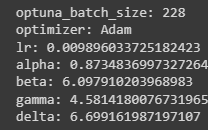

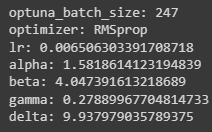![image.png](
  
)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

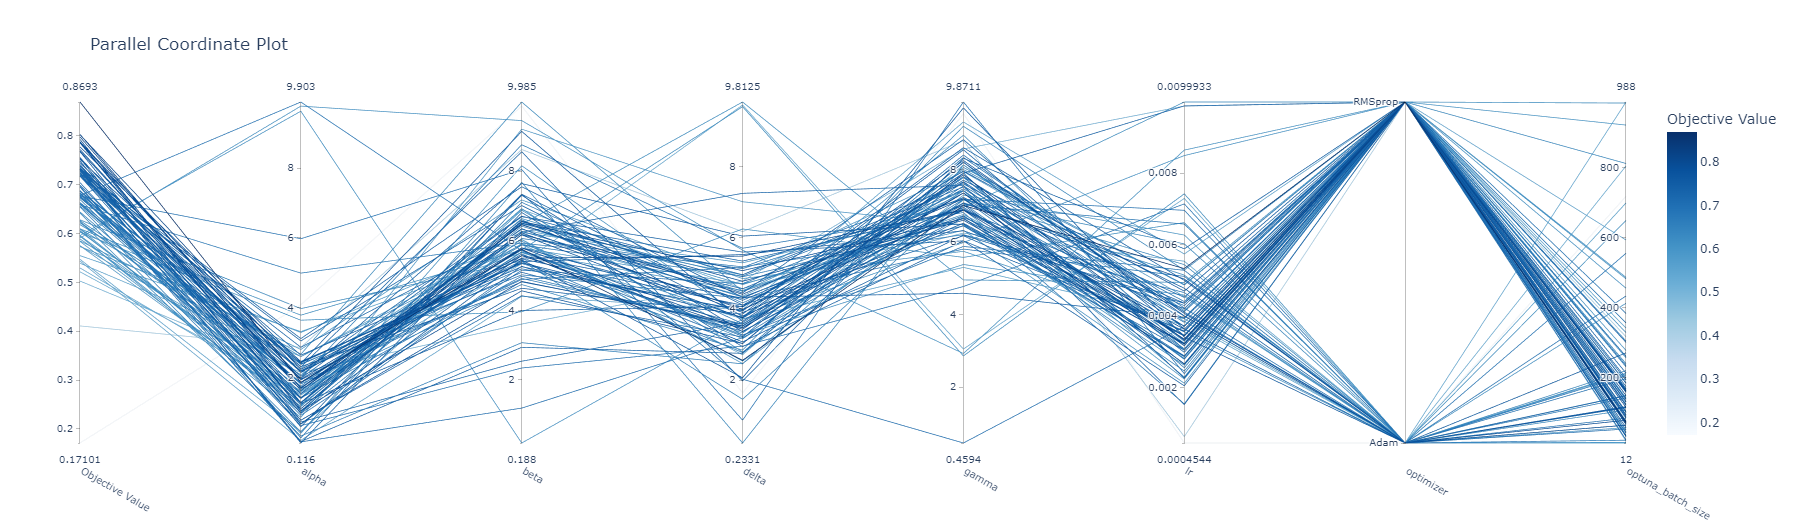

In [ ]:
optuna.visualization.plot_param_importances(study)

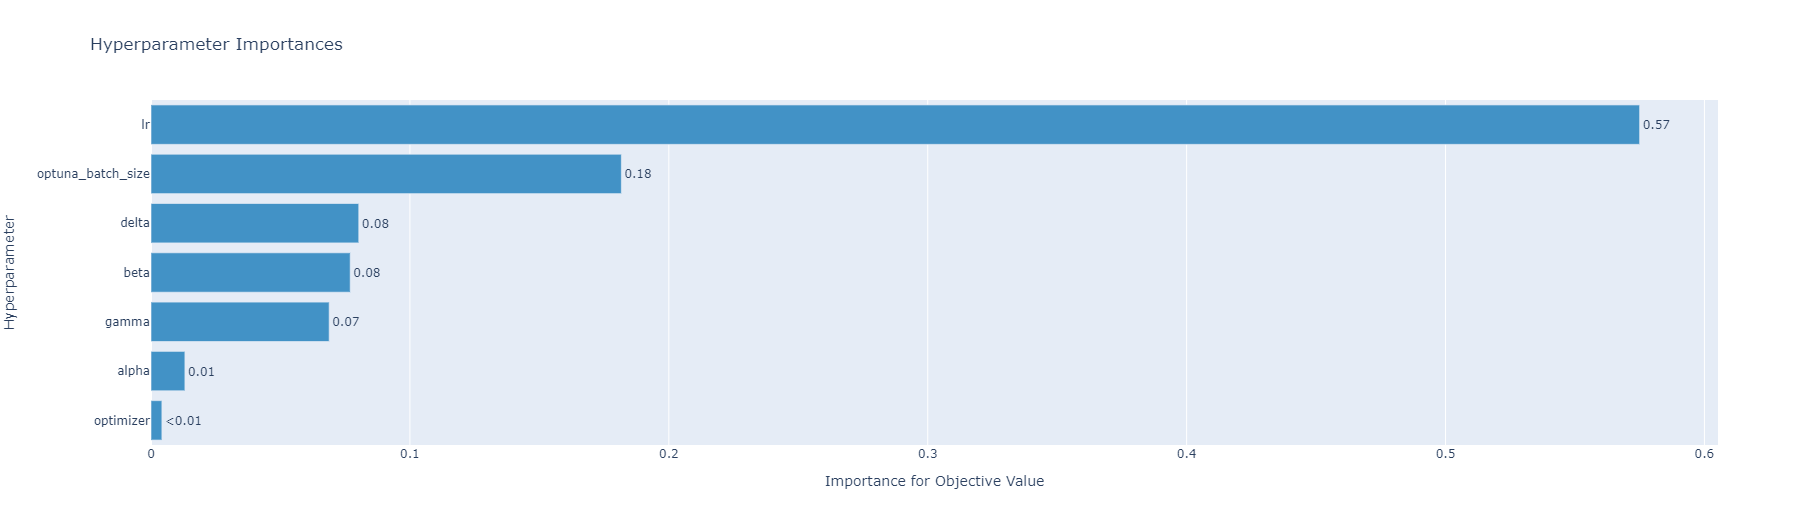

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study,params=['lr'])

In [ ]:
optuna.visualization.plot_intermediate_values(study)

[W 2023-02-27 16:14:32,222] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [ ]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss


In [ ]:
class MagneticLoss(torch.nn.Module):
  def __init__(self, num_classes, strength, width):
      super().__init__()
      self.num_classes = num_classes
      self.strength = strength
      self.width = width     

  def forward(self, z, y):
    N = z.shape[0] # number of samples
    K = self.num_classes # number of classes
    mu = torch.stack([z[y.squeeze==k].mean(dim=0) for k in range(K)], dim=0) # mean of each class
    print(f"mu: {mu}")
    z_center = z[None, :, :] - mu[:, None, :] # centered z
    print(f"z_center: {z_center}")
    z_Norm = z_center.norm(dim=2) # L2 norm of z_Center
    print(f"z_Norm: {z_Norm}")
    exp_term = torch.exp(-self.width * z_Norm)
    pairwise_sum = (exp_term[:, :, None] * exp_term[None, :, :]).sum() - exp_term.sum()
    loss = 0.5 * self.strength * pairwise_sum / N / (K - 1)
    return loss

In [ ]:
# #Model and Optmimizer
# model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.005333473294643382)

# print(model)

# Loss Functions
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()
triplet_loss_fn = nn.TripletMarginLoss(margin=1.0)
#triplet_loss_fn = TripletLoss(margin=1.0)

contrastive_loss_fn = ContrastiveLoss(margin=1)
magnetic_loss_fn = MagneticLoss(num_classes=num_classes, strength=1, width=1)

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
emg_channels = 16
imu_channels = 3

latent_dim = 2
input_dim= len(X.columns)

hidden_dim= round(input_dim/2)
hidden_dim_2 = round(input_dim/4)
output_dim = len(X.columns)
num_classes = 12
num_layers = round(num_classes/2)

num_epochs= 10
batch_size= 70
learning_rate= 0.001 #3e-4 #Karpathy constant
l2_lambda = 0


# alpha= 1.8587892122303267
# beta= 5.756637859229538
# gamma= 7.014002654076303
# delta= 2.5567284050720898

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=41, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
  )
  (mu): Linear(in_features=10, out_features=2, bias=True)
  (logvar): Linear(in_features=10, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): ReLU()
 

AttributeError: ignored

---
Train and Validation loop

In [51]:
train_losses=[]
train_accuracy = []
accuracy_log = []
val_losses=[]
val_accuracy=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())

from tensorboardX import SummaryWriter

# Create a SummaryWriter object
writer = SummaryWriter() 



for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0
  

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Compute the contrastive loss #############################################################################
    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    # Compute the triplet loss #########################
    # Select a random sample as the anchor, then select the positive samples (samples with the same label as the anchor)
    # and negative samples (samples with a different label than the anchor) from the mu
    batch_size = mu.size(0)
    # Select a random sample as the anchor
    anchor_index = torch.randint(0, batch_size, (1,))
    anchor_embeddings = mu[anchor_index].view(1, -1) # Take the embedding for the current sample
    anchor_embeddings = anchor_embeddings.expand(batch_size,-1)
    # Select a fixed number of positive samples
    positive_indices = torch.randint(0, batch_size, (batch_size,))
    positive_embeddings = mu[positive_indices].view(-1,latent_dim)
    # Select a fixed number of negative samples
    negative_indices = torch.randint(0, batch_size, (batch_size,))
    negative_embeddings = mu[negative_indices].view(-1,latent_dim)
    #print(f"anchor_embeddings shape: {anchor_embeddings.shape}, positive_embeddings shape: {positive_embeddings.shape}, negative_embeddings shape: {negative_embeddings.shape}")
    triplet_loss = triplet_loss_fn(anchor_embeddings, positive_embeddings, negative_embeddings)
   
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + delta*contrastive_loss #+ epsilon*triplet_loss

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log for latent space visualziation (gif)...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

   # Write the scalar values to TensorBoard
    writer.add_scalar('loss/total', loss.item(), i)
    writer.add_scalar('loss/reconstruction', reconstruction_loss.item(), i)
    writer.add_scalar('loss/kld', kld_loss.item(), i)
    writer.add_scalar('loss/classification', classification_loss.item(), i)

  writer.add_embedding(z_reparmeterized, metadata=labels, global_step=epoch)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      # Compute the contrastive loss
      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Triplet loss: {triplet_loss:.3f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Close the SummaryWriter
writer.close()

Epoch: 1 / 10 | Reconst_loss: 2142.005 | Kldiv loss: 450.341 | Classifcation loss: 1.997 | Constrast loss: 63.86 | Triplet loss: 1.377 | Total loss: 5621.809 | Train acc: 69.287 % ||| Val Loss: 5477.614 | Val acc: 70.158 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1743.375 | Kldiv loss: 561.123 | Classifcation loss: 2.049 | Constrast loss: 34.98 | Triplet loss: 1.558 | Total loss: 5631.129 | Train acc: 69.169 % ||| Val Loss: 5512.682 | Val acc: 70.475 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | Reconst_loss: 1692.794 | Kldiv loss: 488.038 | Classifcation loss: 1.916 | Constrast loss: 29.12 | Triplet loss: 1.200 | Total loss: 5568.218 | Train acc: 69.379 % ||| Val Lo

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

---
Model Evaluations

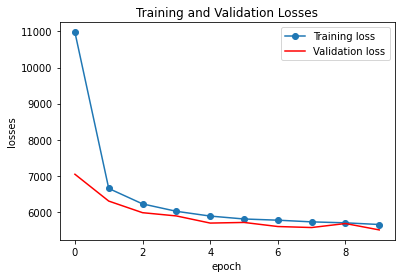

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

---
Latent Space Visualization

In [50]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(12,12))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('gist_rainbow', num_classes))
  cb = plt.colorbar(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],values=[1,2,3,4,5,6,7,8,9,10,11,12])
  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  cb.ax.tick_params(labelsize=10)
  # plt.xlim(-5, 5)
  # plt.ylim(-5, 5)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with {input_dim} features| Acc: {train_acc*100:.1f}% | latent space Dim={latent_dim} | Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")
print()
print("Latent Space Gif being created...")
print()

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave(f"/content/Latent_Space_and_Number_Features_{input_dim}.gif",gif)

from IPython.display import Image

fname = f'/content/Latent_Space_and_Number_Features_{input_dim}.gif'
Image(open(fname, 'rb').read())  # local

Latent Space Visualization
Latent Space Image 1 stored.
Latent Space Image 2 stored.
Latent Space Image 3 stored.
Latent Space Image 4 stored.


KeyboardInterrupt: ignored

In [ ]:
%tensorboard --logdir=runs

---
Test
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")
print()

class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 70
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.005
alpha = 1
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

train_losses=[]
train_accuracy = []
val_losses=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad()

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    loss = (alpha*reconstruction_loss + kld_loss*beta) + classification_loss

    # correct = torch.eq(classified.argmax(dim=1), labels).float()
    # classifcaiton_accuracy = correct.mean()

    # Calculate classification accuracy
    _, predicted = torch.max(classified, 1)
    correct = (predicted == labels.flatten()).sum().item()
    classifcaiton_accuracy = correct / len(predicted)



    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log ...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_classified = v_classified.view(-1, 13)
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      vloss = (alpha*reconstruction_loss + kld_loss*beta) + v_classification_loss

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)


  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | classifcation loss: {classification_loss:.5f} | total loss: {train_loss:.3f} | train acc: {classifcaiton_accuracy:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>

(85969, 19) <class 'numpy.ndarray'> (85969, 1) <class 'numpy.ndarray'>

X_train size: 51581 | X_val size: 17194 | X_test size: 17194
y_train size: 51581 | y_val size: 17194 | y_test size: 17194

Training Feature Split: (51581, 19) | Training Labels (51581, 1)
Validation Feature Split: (17194, 19) | Validation Labels (17194, 1)
Testing Feature Split: (17194, 19) | Testing Labels (17194, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([51581, 19]) , torch.Size([51581, 1])
Validation: torch.Size([17194, 19]) , torch.Size([17194, 1])
Testing:  torch.Size([17194, 19]) , torch.Size([17194, 1])

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): 

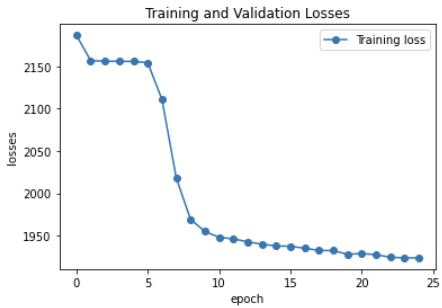